# Soccer Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    <ul>
        <li><a href="### Dataset Description">Dataset Description</a></li>
        <li><a href="### Question(s) for Analysis">Question(s) for Analysis</a></li>
    </ul>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="### Import dataset using read_csv()">Import dataset using read_csv()</a></li>
        <li><a href="### Inspect the tables">Inspect the tables</a></li>
        <li><a href="#wrangling">Data Cleaning</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The soccer database contains data for football matches played from 2008 to 2016 by 299 European football clubs. 

The entire dataset currently contains over 25,000 football matches. 

Table names: 
    - Country (id, name)
    - League (id, country_id, name)
    - Match (id, country_id, league_id, home_team_goal, away_team_goal, and 100 other columns) 
    - Player
    - Team
    - Player Attributes
    - Team Attributes

### Question(s) for Analysis


>The analysis is focused on:
1. Which teams won the most matches from 2008 to 2016?
2. Which teams improved the most from 2008 to 2016?
3. What team attributes led to the most victories or goals scored?

## Data Wrangling

#### Import packages needed

In [1]:
# Import pandas, matplotlib, and numpy packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 'magic word' to display visualisations in this notebook
% matplotlib inline

# Import pandasql package
#!pip install -U pandasql
from pandasql import sqldf
postgresql = lambda q: sqldf(q, globals())

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas

In [3]:
# Upgrade matplotlib so charts are automatically sorted by y-axis
#!pip install --upgrade matplotlib

<a id='wrangling'></a>
### Import Soccer dataset and Investigate

#### Import dataset using read_csv()

In [4]:
# Import the seven tables that make up the Soccer dataset
df_country = pd.read_csv('Database_Soccer/Country.csv')
df_league = pd.read_csv('Database_Soccer/League.csv')
df_match = pd.read_csv('Database_Soccer/Match.csv')
df_player = pd.read_csv('Database_Soccer/Player.csv')
df_player_att = pd.read_csv('Database_Soccer/Player_Attributes.csv')
df_team = pd.read_csv('Database_Soccer/Team.csv')
df_team_att = pd.read_csv('Database_Soccer/Team_Attributes.csv')

#### Inspect Country and League tables

In [5]:
# Inspect Country
df_country

id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland

There are eleven countries.

In [6]:
# Inspect league
df_league

id  country_id                      name
0       1           1    Belgium Jupiler League
1    1729        1729    England Premier League
2    4769        4769            France Ligue 1
3    7809        7809     Germany 1. Bundesliga
4   10257       10257             Italy Serie A
5   13274       13274    Netherlands Eredivisie
6   15722       15722        Poland Ekstraklasa
7   17642       17642  Portugal Liga ZON Sagres
8   19694       19694   Scotland Premier League
9   21518       21518           Spain LIGA BBVA
10  24558       24558  Switzerland Super League

There are eleven leagues.

#### Inspect the Match table

In [7]:
# Assess how many columns Match has
df_match.shape

(25979, 115)

The `Match` table has 115 columns! Let's examine all of the columns and see if we need them all.

In [8]:
# View all columns in Match table with .head() method
df_match.head(1)

id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  SJA  \
0        492473              9987              9993               1  ...  4.0   

    VCH  VCD  VCA   GBH   GBD  GBA   BSH  BSD  BSA  
0  1.65  3.4  4.5  1.78  3.25  4.0  1.73  3.4  4.2  

[1 rows x 115 columns]

In [9]:
# View all columns in Match table with .columns attribute
df_match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [10]:
# View all columns in Match table with .info() method
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


Okay. Jupyter isn't displaying all of the columns. Let's force Jupyter to display all 115 columns.

In [11]:
# Setting to display all columns
pd.set_option("display.max_columns", None)

# display columns of Match table with .head()
df_match.head(1)

id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
0        492473              9987              9993               1   

   away_team_goal  home_player_X1  home_player_X2  home_player_X3  \
0               1             NaN             NaN             NaN   

   home_player_X4  home_player_X5  home_player_X6  home_player_X7  \
0             NaN             NaN             NaN             NaN   

   home_player_X8  home_player_X9  home_player_X10  home_player_X11  \
0             NaN             NaN              NaN              NaN   

   away_player_X1  away_player_X2  away_player_X3  away_player_X4  \
0             NaN             NaN             NaN             NaN   

   away_player_X5  away_player_X6  away_player_X7  away_player_X8  \
0             NaN             NaN             NaN             NaN   

   away_player_X9  away_player_X10  away_player_X11  home_player_Y1  \
0             NaN              NaN              NaN             NaN   

   home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  \
0             NaN             NaN             NaN             NaN   

   home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  \
0             NaN             NaN             NaN             NaN   

   home_player_Y10  home_player_Y11  away_player_Y1  away_player_Y2  \
0              NaN              NaN             NaN             NaN   

   away_player_Y3  away_player_Y4  away_player_Y5  away_player_Y6  \
0             NaN             NaN             NaN             NaN   

   away_player_Y7  away_player_Y8  away_player_Y9  away_player_Y10  \
0             NaN             NaN             NaN              NaN   

   away_player_Y11  home_player_1  home_player_2  home_player_3  \
0              NaN            NaN            NaN            NaN   

   home_player_4  home_player_5  home_player_6  home_player_7  home_player_8  \
0            NaN            NaN            NaN            NaN            NaN   

   home_player_9  home_player_10  home_player_11  away_player_1  \
0            NaN             NaN             NaN            NaN   

   away_player_2  away_player_3  away_player_4  away_player_5  away_player_6  \
0            NaN            NaN            NaN            NaN            NaN   

   away_player_7  away_player_8  away_player_9  away_player_10  \
0            NaN            NaN            NaN             NaN   

   away_player_11 goal shoton shotoff foulcommit card cross corner possession  \
0             NaN  NaN    NaN     NaN        NaN  NaN   NaN    NaN        NaN   

   B365H  B365D  B365A   BWH   BWD  BWA   IWH  IWD  IWA  LBH  LBD   LBA  PSH  \
0   1.73    3.4    5.0  1.75  3.35  4.2  1.85  3.2  3.5  1.8  3.3  3.75  NaN   

   PSD  PSA  WHH  WHD   WHA  SJH  SJD  SJA   VCH  VCD  VCA   GBH   GBD  GBA  \
0  NaN  NaN  1.7  3.3  4.33  1.9  3.3  4.0  1.65  3.4  4.5  1.78  3.25  4.0   

    BSH  BSD  BSA  
0  1.73  3.4  4.2

There are two groups of columns that won't be useful in answering the research questions: 
 - Team formation columns (from `home_player_X1` to `away_player_Y11`), and 
 - Betting odds columns (from `B365H` to `BSA`)
 
We will drop these columns in the Data Cleaning section

In [12]:
# checking for nulls in Match table
df_match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

Okay. Jupyter isn't displaying all the columns. I'll splice the first 55 and the last 60.

In [13]:
# Null values in the first 55 columns of the Match table
df_match.iloc[:, 0:55].isnull().sum()

id                     0
country_id             0
league_id              0
season                 0
stage                  0
date                   0
match_api_id           0
home_team_api_id       0
away_team_api_id       0
home_team_goal         0
away_team_goal         0
home_player_X1      1821
home_player_X2      1821
home_player_X3      1832
home_player_X4      1832
home_player_X5      1832
home_player_X6      1832
home_player_X7      1832
home_player_X8      1832
home_player_X9      1832
home_player_X10     1832
home_player_X11     1832
away_player_X1      1832
away_player_X2      1832
away_player_X3      1832
away_player_X4      1832
away_player_X5      1832
away_player_X6      1832
away_player_X7      1832
away_player_X8      1832
away_player_X9      1833
away_player_X10     1833
away_player_X11     1839
home_player_Y1      1821
home_player_Y2      1821
home_player_Y3      1832
home_player_Y4      1832
home_player_Y5      1832
home_player_Y6      1832
home_player_Y7      1832


In [14]:
# Null values in the last 60 columns of the Match table
df_match.iloc[:, -60:].isnull().sum()

home_player_1      1224
home_player_2      1315
home_player_3      1281
home_player_4      1323
home_player_5      1316
home_player_6      1325
home_player_7      1227
home_player_8      1309
home_player_9      1273
home_player_10     1436
home_player_11     1555
away_player_1      1234
away_player_2      1278
away_player_3      1293
away_player_4      1321
away_player_5      1335
away_player_6      1313
away_player_7      1235
away_player_8      1341
away_player_9      1328
away_player_10     1441
away_player_11     1554
goal              11762
shoton            11762
shotoff           11762
foulcommit        11762
card              11762
cross             11762
corner            11762
possession        11762
B365H              3387
B365D              3387
B365A              3387
BWH                3404
BWD                3404
BWA                3404
IWH                3459
IWD                3459
IWA                3459
LBH                3423
LBD                3423
LBA             

There are 22 matchday squad columns (from `home_player_1` to `away_player_11`). They each contain a maximum of 1555 null values.

From `goal` to `possession`, the 8 columns each contain 11,762 null values. If we were to drop the nulls, we might have to drop 45% of our Match data!

In [15]:
# Null values make up what proportion of rows in goal column?
df_match['goal'].isnull().sum() / df_match.shape[0]

0.4527502983178721

In [16]:
# Print out the number of duplicates in Match table
sum(df_match.duplicated())

0

In [17]:
# Data types of the first 55 columns of Match table
df_match.iloc[:, 0:55].dtypes

id                    int64
country_id            int64
league_id             int64
season               object
stage                 int64
date                 object
match_api_id          int64
home_team_api_id      int64
away_team_api_id      int64
home_team_goal        int64
away_team_goal        int64
home_player_X1      float64
home_player_X2      float64
home_player_X3      float64
home_player_X4      float64
home_player_X5      float64
home_player_X6      float64
home_player_X7      float64
home_player_X8      float64
home_player_X9      float64
home_player_X10     float64
home_player_X11     float64
away_player_X1      float64
away_player_X2      float64
away_player_X3      float64
away_player_X4      float64
away_player_X5      float64
away_player_X6      float64
away_player_X7      float64
away_player_X8      float64
away_player_X9      float64
away_player_X10     float64
away_player_X11     float64
home_player_Y1      float64
home_player_Y2      float64
home_player_Y3      

In [18]:
# Data types of the last 60 columns of Match table
df_match.iloc[:, -60:].dtypes

home_player_1     float64
home_player_2     float64
home_player_3     float64
home_player_4     float64
home_player_5     float64
home_player_6     float64
home_player_7     float64
home_player_8     float64
home_player_9     float64
home_player_10    float64
home_player_11    float64
away_player_1     float64
away_player_2     float64
away_player_3     float64
away_player_4     float64
away_player_5     float64
away_player_6     float64
away_player_7     float64
away_player_8     float64
away_player_9     float64
away_player_10    float64
away_player_11    float64
goal               object
shoton             object
shotoff            object
foulcommit         object
card               object
cross              object
corner             object
possession         object
B365H             float64
B365D             float64
B365A             float64
BWH               float64
BWD               float64
BWA               float64
IWH               float64
IWD               float64
IWA         

That is interesting! `goal` to `possession` columns contain strings. I would have expected an integer.

###### Let's examine the strings in the `goal`, `shoton`, `shotoff`, `card`, `corner`, `possession` columns. We'll use the first row of `df_match_goal_notnull` table.

In [19]:
# Get rows where the goal column isn't null
df_match_goal_notnull = df_match[df_match['goal'].notnull()]

df_match_goal_notnull.head()

id  country_id  league_id     season  stage                 date  \
1728  1729        1729       1729  2008/2009      1  2008-08-17 00:00:00   
1729  1730        1729       1729  2008/2009      1  2008-08-16 00:00:00   
1730  1731        1729       1729  2008/2009      1  2008-08-16 00:00:00   
1731  1732        1729       1729  2008/2009      1  2008-08-16 00:00:00   
1732  1733        1729       1729  2008/2009      1  2008-08-17 00:00:00   

      match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
1728        489042             10260             10261               1   
1729        489043              9825              8659               1   
1730        489044              8472              8650               0   
1731        489045              8654              8528               2   
1732        489046             10252              8456               4   

      away_team_goal  home_player_X1  home_player_X2  home_player_X3  \
1728               1             1.0             2.0             4.0   
1729               0             1.0             2.0             4.0   
1730               1             1.0             2.0             4.0   
1731               1             1.0             2.0             4.0   
1732               2             1.0             2.0             4.0   

      home_player_X4  home_player_X5  home_player_X6  home_player_X7  \
1728             6.0             8.0             2.0             4.0   
1729             6.0             8.0             2.0             4.0   
1730             6.0             8.0             2.0             4.0   
1731             6.0             8.0             2.0             4.0   
1732             6.0             8.0             2.0             4.0   

      home_player_X8  home_player_X9  home_player_X10  home_player_X11  \
1728             6.0             8.0              4.0              6.0   
1729             6.0             8.0              4.0              6.0   
1730             6.0             8.0              4.0              6.0   
1731             6.0             8.0              4.0              6.0   
1732             6.0             8.0              4.0              6.0   

      away_player_X1  away_player_X2  away_player_X3  away_player_X4  \
1728             1.0             2.0             4.0             6.0   
1729             1.0             2.0             4.0             6.0   
1730             1.0             2.0             4.0             6.0   
1731             1.0             2.0             6.0             8.0   
1732             1.0             2.0             4.0             6.0   

      away_player_X5  away_player_X6  away_player_X7  away_player_X8  \
1728             8.0             2.0             4.0             6.0   
1729             8.0             5.0             7.0             9.0   
1730             8.0             2.0             4.0             6.0   
1731             4.0             2.0             4.0             6.0   
1732             8.0             1.0             3.0             5.0   

      away_player_X9  away_player_X10  away_player_X11  home_player_Y1  \
1728             8.0              5.0              5.0             1.0   
1729             1.0              3.0              5.0             1.0   
1730             8.0              4.0              6.0             1.0   
1731             8.0              4.0              6.0             1.0   
1732             7.0              9.0              5.0             1.0   

      home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  \
1728             3.0             3.0             3.0             3.0   
1729             3.0             3.0             3.0             3.0   
1730             3.0             3.0             3.0             3.0   
1731             3.0             3.0             3.0             3.0   
1732             3.0             3.0             3.0             3.0   

      home_player_Y6  home_player_Y7  home_player_Y

In [20]:
# Examine the string in the goal column using first row of df_match_goal_notnull.

df_match_goal_notnull.loc[1728, 'goal']

'<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>406</event_incident_typefk><elapsed>22</elapsed><player2>38807</player2><subtype>header</subtype><player1>37799</player1><sortorder>5</sortorder><team>10261</team><id>378998</id><n>295</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>24</elapsed><player2>24154</player2><subtype>shot</subtype><player1>24148</player1><sortorder>4</sortorder><team>10260</team><id>379019</id><n>298</n><type>goal</type><goal_type>n</goal_type></value></goal>'

In [21]:
# The string in the shoton column.
df_match_goal_notnull.loc[1728, 'shoton']

'<shoton><value><stats><blocked>1</blocked></stats><event_incident_typefk>61</event_incident_typefk><elapsed>3</elapsed><subtype>blocked_shot</subtype><player1>24154</player1><sortorder>0</sortorder><team>10260</team><n>253</n><type>shoton</type><id>378828</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>154</event_incident_typefk><elapsed>7</elapsed><subtype>header</subtype><player1>24157</player1><sortorder>2</sortorder><team>10260</team><n>258</n><type>shoton</type><id>378866</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>153</event_incident_typefk><elapsed>14</elapsed><subtype>shot</subtype><player1>30829</player1><sortorder>1</sortorder><team>10260</team><n>274</n><type>shoton</type><id>378922</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>153</event_incident_typefk><elapsed>14</elapsed><subtype>shot</subtype><player1>30373</player1><sortorder>2</sortorder><team>10260</team><n>279</n><type>shoton</ty

In [22]:
# The string in the shotoff column.
df_match_goal_notnull.loc[1728, 'shotoff']

'<shotoff><value><stats><shotoff>1</shotoff></stats><event_incident_typefk>9</event_incident_typefk><elapsed>4</elapsed><subtype>distance</subtype><player1>30373</player1><sortorder>1</sortorder><team>10260</team><n>264</n><type>shotoff</type><id>378835</id></value><value><stats><shotoff>1</shotoff></stats><event_incident_typefk>9</event_incident_typefk><elapsed>5</elapsed><subtype>distance</subtype><player1>37799</player1><sortorder>2</sortorder><team>10261</team><n>257</n><type>shotoff</type><id>378845</id></value><value><stats><shotoff>1</shotoff></stats><event_incident_typefk>317</event_incident_typefk><elapsed>22</elapsed><subtype>deflected</subtype><player1>24228</player1><sortorder>3</sortorder><team>10261</team><n>269</n><type>shotoff</type><id>378995</id></value><value><stats><shotoff>1</shotoff></stats><event_incident_typefk>9</event_incident_typefk><elapsed>31</elapsed><subtype>distance</subtype><player1>38807</player1><sortorder>0</sortorder><team>10261</team><n>278</n><typ

In [23]:
# The string in the foulcommit column
df_match_goal_notnull.loc[1728, 'foulcommit']

'<foulcommit><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>1</elapsed><player2>32569</player2><player1>25518</player1><sortorder>1</sortorder><team>10261</team><n>267</n><type>foulcommit</type><id>378824</id></value><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>2</elapsed><player2>24157</player2><player1>30929</player1><sortorder>0</sortorder><team>10261</team><n>277</n><type>foulcommit</type><id>378826</id></value><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>3</elapsed><player2>24148</player2><player1>29581</player1><sortorder>1</sortorder><team>10261</team><n>254</n><type>foulcommit</type><id>378830</id></value><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>5</elapsed><player2>40565</player2><player1>30373</player1><

In [24]:
# The string in the card column
df_match_goal_notnull.loc[1728, 'card']

'<card><value><comment>y</comment><stats><ycards>1</ycards></stats><event_incident_typefk>73</event_incident_typefk><elapsed>78</elapsed><card_type>y</card_type><subtype>serious_fouls</subtype><player1>24157</player1><sortorder>1</sortorder><team>10260</team><n>342</n><type>card</type><id>379481</id></value><value><comment>y</comment><stats><ycards>1</ycards></stats><event_incident_typefk>73</event_incident_typefk><elapsed>82</elapsed><card_type>y</card_type><subtype>serious_fouls</subtype><player1>30362</player1><sortorder>1</sortorder><team>10260</team><n>346</n><type>card</type><id>379503</id></value><value><comment>y</comment><stats><ycards>1</ycards></stats><event_incident_typefk>70</event_incident_typefk><elapsed>90</elapsed><card_type>y</card_type><player1>30829</player1><sortorder>1</sortorder><team>10260</team><n>353</n><type>card</type><id>379547</id></value></card>'

In [25]:
# The string in the cross column?
df_match_goal_notnull.loc[1728, 'cross']

'<cross><value><stats><crosses>1</crosses></stats><event_incident_typefk>7</event_incident_typefk><elapsed>7</elapsed><subtype>cross</subtype><player1>30829</player1><sortorder>1</sortorder><team>10260</team><n>265</n><type>cross</type><id>378863</id></value><value><stats><crosses>1</crosses></stats><event_incident_typefk>7</event_incident_typefk><elapsed>14</elapsed><subtype>cross</subtype><player1>24148</player1><sortorder>0</sortorder><team>10260</team><n>255</n><type>cross</type><id>378921</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>19</elapsed><subtype>cross</subtype><player1>38807</player1><sortorder>0</sortorder><team>10261</team><n>280</n><type>corner</type><id>378960</id></value><value><stats><crosses>1</crosses></stats><event_incident_typefk>7</event_incident_typefk><elapsed>19</elapsed><subtype>cross</subtype><player1>30929</player1><sortorder>5</sortorder><team>10261</team><n>292</n><type>cross</type><id>3

In [26]:
# The string in the corner column?
df_match_goal_notnull.loc[1728, 'corner']

'<corner><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>19</elapsed><subtype>cross</subtype><player1>38807</player1><sortorder>0</sortorder><team>10261</team><n>280</n><type>corner</type><id>378960</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>330</event_incident_typefk><elapsed>22</elapsed><subtype>short</subtype><player1>40565</player1><sortorder>0</sortorder><team>10261</team><n>263</n><type>corner</type><id>378992</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>22</elapsed><subtype>cross</subtype><player1>38807</player1><sortorder>4</sortorder><team>10261</team><n>293</n><type>corner</type><id>378996</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>48</elapsed><subtype>cross</subtype><player1>24154</player1><sortorder>2</sortorder><team>10260</team><n>300</n><type>corner<

In [27]:
# The string in the possession column?
df_match_goal_notnull.loc[1728, 'possession']

'<possession><value><comment>56</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>44</awaypos><homepos>56</homepos><n>68</n><type>special</type><id>379029</id></value><value><comment>54</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>4</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>117</n><type>special</type><id>379251</id></value><value><comment>54</comment><event_incident_typefk>352</event_incident_typefk><elapsed>70</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>190</n><type>special</type><id>379443</id></value><value><comment>55</comment><elapsed_plus>5</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>45</awaypos><homepos>55</h

At first glance, the `goal` column has xml tags per goal with info on:
    - how many goals (<goals>1</goals>),
    - shoton (<shoton>1</shoton>),
    - event_incident_type foreign key? (<event_incident_typefk>406</event_incident_typefk>),
    - minutes elapsed (<elapsed>22</elapsed>),
    - player2 id (<player2>38807</player2>),
    - goal subtype (<subtype>header</subtype>),
    - player1 id (<player1>37799</player1>),
    - sortorder? (<sortorder>5</sortorder>),
    - team id (<team>10261</team>),
    - id? (<id>378998</id>).

The others contain xml tags as well. As interesting as these columns are, the extra info they offer up aren't required to answer our research questions. Thus, I'll drop `goal`, `shoton`, `shotoff`, `foulcommit`, `card`, `cross`, `corner`, `possession` columns. We'll call them the *unwanted string columns*.

#### Inspect Player and Player Attributes tables

In [28]:
# Inspect player
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


`birthday` is a string where one would expect datetime. We'll need to convert it to datetime.

In [29]:
# Let's see the first five rows
df_player.head()

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154

In [30]:
# Are there any duplicates?
sum(df_player.duplicated())

0

In [31]:
# Which columns contain null values and how many null values do they contain?
df_player.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [32]:
# Inspect player_attributes
df_player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

We'll need to convert `date` from string to datetime.

In [33]:
df_player_att.head()

id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
0       44.0              71.0           61.0     44.0       51.0   45.0   
1       44.0              71.0           61.0     44.0       51.0   45.0   
2       44.0              71.0           61.0     44.0       51.0   45.0   
3       43.0              70.0           60.0     43.0       50.0   44.0   
4       43.0              70.0           60.0     43.0       50.0   44.0   

   free_kick_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0                39.0          64.0          49.0          60.0          64.0   
1                39.0          64.0          49.0          60.0          64.0   
2                39.0          64.0          49.0          60.0          64.0   
3                38.0          63.0          48.0          60.0          64.0   
4                38.0          63.0          48.0          60.0          64.0   

   agility  reactions  balance  shot_power  jumping  stamina  strength  \
0     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
1     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
2     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
3     59.0       46.0     65.0        54.0     58.0     54.0      76.0   
4     59.0       46.0     65.0        54.0     58.0     54.0      76.0   

   long_shots  aggression  interceptions  positioning  vision  penalties  \
0        35.0        71.0           70.0         45.0    54.0       48.0   
1        35.0        71.0           70.0         45.0    54.0       48.0   
2        35.0        63.0           41.0         45.0    54.0       48.0   
3        34.0        62.0           40.0         44.0    53.0       47.0   
4        34.0        62.0           40.0         44.0    53.0       47.0   

   marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0     65.0             69.0            69.0        6.0         11.0   
1     65.0             69.0            69.0        6.0         11.0   
2     65.0             66.0            69.0        6.0         11.0   
3     62.0             63.0            66.0        5.0         10.0   
4     62.0             63.0            66.0        5.0         10.0   

   gk_kicking  gk_positioning  gk_reflexes  
0        10.0             8.0          8.0  
1        10.0             8.0          8.0  
2        10.0             8.0          8.0  
3         9.0             7.0          7.0  
4         9.0             7.0          7.0

I'll be dropping every column here except `player_api_id`, `date`, and `overall_rating`.

In [34]:
# Print out the number of duplicates
sum(df_player_att.duplicated())

0

In [35]:
#prints out columns containing nulls and number of null
df_player_att.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

#### Inspect Team and Team_Attributes tables

In [36]:
# Inspect team
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [37]:
# First ten rows of the Team table
df_team.head(10)

id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987             673.0           KRC Genk             GEN
1   2         9993             675.0       Beerschot AC             BAC
2   3        10000           15005.0   SV Zulte-Waregem             ZUL
3   4         9994            2007.0   Sporting Lokeren             LOK
4   5         9984            1750.0  KSV Cercle Brugge             CEB
5   6         8635             229.0     RSC Anderlecht             AND
6   7         9991             674.0           KAA Gent             GEN
7   8         9998            1747.0          RAEC Mons             MON
8   9         7947               NaN      FCV Dender EH             DEN
9  10         9985             232.0  Standard de Liège             STL

In [38]:
# Number of duplicates in Team table
sum(df_team.duplicated())

0

In [39]:
# Columns containing nulls and number of null in Team table
df_team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [40]:
# Inspect team_attributes
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

We'll need to convert `date` from string to datetime.

In [41]:
# First five rows of Team Attributes table
df_team_att.head()

id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
1   2               434         9930  2014-09-19 00:00:00                52   
2   3               434         9930  2015-09-10 00:00:00                47   
3   4                77         8485  2010-02-22 00:00:00                70   
4   5                77         8485  2011-02-22 00:00:00                47   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                  48.0                    Normal   
2              Balanced                  41.0                    Normal   
3                  Fast                   NaN                    Little   
4              Balanced                   NaN                    Little   

   buildUpPlayPassing buildUpPlayPassingClass buildUpPlayPositioningClass  \
0                  50                   Mixed                   Organised   
1                  56                   Mixed                   Organised   
2                  54                   Mixed                   Organised   
3                  70                    Long                   Organised   
4                  52                   Mixed                   Organised   

   chanceCreationPassing chanceCreationPassingClass  chanceCreationCrossing  \
0                     60                     Normal                      65   
1                     54                     Normal                      63   
2                     54                     Normal                      63   
3                     70                      Risky                      70   
4                     53                     Normal                      48   

  chanceCreationCrossingClass  chanceCreationShooting  \
0                      Normal                      55   
1                      Normal                      64   
2                      Normal                      64   
3                        Lots                      70   
4                      Normal                      52   

  chanceCreationShootingClass chanceCreationPositioningClass  defencePressure  \
0                      Normal                      Organised               50   
1                      Normal                      Organised               47   
2                      Normal                      Organised               47   
3                        Lots                      Organised               60   
4                      Normal                      Organised               47   

  defencePressureClass  defenceAggression defenceAggressionClass  \
0               Medium                 55                  Press   
1               Medium                 44                  Press   
2               Medium                 44                  Press   
3               Medium                 70                 Double   
4               Medium                 47                  Press   

   defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass  
0                45                Normal                    Cover  
1                54                Normal                    Cover  
2                54                Normal                    Cover  
3                70                  Wide                    Cover  
4                52                Normal                    Cover

I'm skeptical of buildUpPlayDribblingClass indicating 'Little' when its corresponding buildUpPlayDribbling value is null. 

I'll be dropping the `team_fifa_api_id`, `buildUpPlayDribbling`, and `buildUpPlayDribblingClass` columns of the Team Attributes table.

### Data Cleaning
1. Drop:
     - the *betting columns*, *formation columns*, and the *unwanted string columns* from the `Match` table.
     - all columns in `Player_Attributes` **except** `player_api_id`, `date`, and `overall_rating`.
     - the `team_fifa_api_id`, `buildUpPlayDribbling`, and `buildUpPlayDribblingClass` columns of the Team Attributes table.
2. Drop missing values in:
    - Match table
    - Player_Attributes table (overall_rating column)
3. Merge:
     - Import Country name, League name, and Player name into the `Match` table and discard the `Country` and `League` tables. 
     - the `Player` and `Player_Attributes` tables.
4. Convert (`birthday`, `date`) from string to datetime in merged `Match`, `Player`, and `Team` tables.

###### Drop unwanted columns from Match table

Luckily, the unwanted Match columns are clustered together, so we can slice and delete each set.
 - *Betting columns* are from `B365H` to `BSA`.
 - *Formation columns* are from `home_player_X1` to `away_player_Y11`.
 - *The unwanted string* columns are from `goal` to `possession`.

In [42]:
# Create a function to slice the unwanted columns and delete them

def drop_col_range(df, first_col='', last_col=''):
    # df is the dataframe name
    # first_col is the first column in the range of columns you want to delete
    # last_col is the last column in the range of columns you want to delete
    
    # Get unwanted columns
    unwanted_col = df.loc[:, first_col : last_col]
    
    # Drop unwanted columns from df
    df.drop(unwanted_col, inplace=True, axis=1)
    
    # Success message
    print('Columns ' + first_col + ' to ' + last_col + ' removed successfully.')
    
    # Returns the updated table
    return df.columns

In [43]:
# Drop betting columns
drop_col_range(df_match, first_col='B365H', last_col='BSA')

Columns B365H to BSA removed successfully.


Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_

In [44]:
# Drop formation columns
drop_col_range(df_match, first_col='home_player_X1', last_col='away_player_Y11')

Columns home_player_X1 to away_player_Y11 removed successfully.


Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11',
       'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner',
       'possession'],
      dtype='object')

In [45]:
# Drop shoton, shotoff, foulcommit, card, cross, corner, and possession columns
drop_col_range(df_match, first_col='goal', last_col='possession')

Columns goal to possession removed successfully.


Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11'],
      dtype='object')

###### Drop all columns in `Player_Attributes` except `player_api_id`, `date`, and `overall_rating`.

In [46]:
df_player_att.head()

id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
0       44.0              71.0           61.0     44.0       51.0   45.0   
1       44.0              71.0           61.0     44.0       51.0   45.0   
2       44.0              71.0           61.0     44.0       51.0   45.0   
3       43.0              70.0           60.0     43.0       50.0   44.0   
4       43.0              70.0           60.0     43.0       50.0   44.0   

   free_kick_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0                39.0          64.0          49.0          60.0          64.0   
1                39.0          64.0          49.0          60.0          64.0   
2                39.0          64.0          49.0          60.0          64.0   
3                38.0          63.0          48.0          60.0          64.0   
4                38.0          63.0          48.0          60.0          64.0   

   agility  reactions  balance  shot_power  jumping  stamina  strength  \
0     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
1     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
2     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
3     59.0       46.0     65.0        54.0     58.0     54.0      76.0   
4     59.0       46.0     65.0        54.0     58.0     54.0      76.0   

   long_shots  aggression  interceptions  positioning  vision  penalties  \
0        35.0        71.0           70.0         45.0    54.0       48.0   
1        35.0        71.0           70.0         45.0    54.0       48.0   
2        35.0        63.0           41.0         45.0    54.0       48.0   
3        34.0        62.0           40.0         44.0    53.0       47.0   
4        34.0        62.0           40.0         44.0    53.0       47.0   

   marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0     65.0             69.0            69.0        6.0         11.0   
1     65.0             69.0            69.0        6.0         11.0   
2     65.0             66.0            69.0        6.0         11.0   
3     62.0             63.0            66.0        5.0         10.0   
4     62.0             63.0            66.0        5.0         10.0   

   gk_kicking  gk_positioning  gk_reflexes  
0        10.0             8.0          8.0  
1        10.0             8.0          8.0  
2        10.0             8.0          8.0  
3         9.0             7.0          7.0  
4         9.0             7.0          7.0

In [47]:
# The three columns we want to keep in the Player_Attributes table
chosen_cols = ['player_api_id', 'date', 'overall_rating']

# Return the index of every column in Player_Attributes except the chosen_cols
goodbye_cols = df_player_att.columns.difference(chosen_cols)

# Drop goodbye_cols
df_player_att.drop(df_player_att[goodbye_cols], inplace=True, axis=1)

In [48]:
# Confirm that Player Attributes now only has three columns.
df_player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_api_id   183978 non-null  int64  
 1   date            183978 non-null  object 
 2   overall_rating  183142 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ MB


###### Drop `team_fifa_api_id`, `buildUpPlayDribbling`, and `buildUpPlayDribblingClass` columns of the Team Attributes table.

In [49]:
df_team_att.drop(['team_fifa_api_id', 'buildUpPlayDribbling', 'buildUpPlayDribblingClass'], inplace=True, axis=1)

In [50]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_api_id                     1458 non-null   int64 
 2   date                            1458 non-null   object
 3   buildUpPlaySpeed                1458 non-null   int64 
 4   buildUpPlaySpeedClass           1458 non-null   object
 5   buildUpPlayPassing              1458 non-null   int64 
 6   buildUpPlayPassingClass         1458 non-null   object
 7   buildUpPlayPositioningClass     1458 non-null   object
 8   chanceCreationPassing           1458 non-null   int64 
 9   chanceCreationPassingClass      1458 non-null   object
 10  chanceCreationCrossing          1458 non-null   int64 
 11  chanceCreationCrossingClass     1458 non-null   object
 12  chanceCreationShooting          1458 non-null   

###### Drop Null values

In [51]:
# Drop the 836 null values in Player_Attributes table
df_player_att = df_player_att.dropna()
df_player_att.isna().sum()

player_api_id     0
date              0
overall_rating    0
dtype: int64

In [52]:
# Drop null values in Match table
df_match = df_match.dropna()
df_match.isna().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
home_player_1       0
home_player_2       0
home_player_3       0
home_player_4       0
home_player_5       0
home_player_6       0
home_player_7       0
home_player_8       0
home_player_9       0
home_player_10      0
home_player_11      0
away_player_1       0
away_player_2       0
away_player_3       0
away_player_4       0
away_player_5       0
away_player_6       0
away_player_7       0
away_player_8       0
away_player_9       0
away_player_10      0
away_player_11      0
dtype: int64

In [53]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [54]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_api_id                     1458 non-null   int64 
 2   date                            1458 non-null   object
 3   buildUpPlaySpeed                1458 non-null   int64 
 4   buildUpPlaySpeedClass           1458 non-null   object
 5   buildUpPlayPassing              1458 non-null   int64 
 6   buildUpPlayPassingClass         1458 non-null   object
 7   buildUpPlayPositioningClass     1458 non-null   object
 8   chanceCreationPassing           1458 non-null   int64 
 9   chanceCreationPassingClass      1458 non-null   object
 10  chanceCreationCrossing          1458 non-null   int64 
 11  chanceCreationCrossingClass     1458 non-null   object
 12  chanceCreationShooting          1458 non-null   

### Merge related tables using SQL Join
Out of the seven tables in the Soccer dataset, I need three (Match, Player Attributes, Team Attributes) to answer my research questions. Having seen how the tables relate to each other, I will go ahead to:
> 1. Import Country name, League name, and Player name to Match table (Left Outer Join)
> 2. Join Player_Attributes table with Player table (Left Outer Join)
> 3. Join Team_Attributes with Team table (Left Outer Join)

In [55]:
# 1. Import name columns from Country, League, and Team tables into Match table
df_match_mrg = postgresql('''SELECT M.match_api_id match_id,
                                M.season,
                                M.stage,
                                M.date,
                                H.team_long_name home_team,
                                M.home_team_api_id,
                                A.team_long_name away_team,
                                M.away_team_api_id,
                                M.home_team_goal,
                                M.away_team_goal,
                                L.name league,
                                C.name country 
                                
                           FROM df_match M 
                           
                           LEFT JOIN df_country C 
                           ON C.id = M.country_id 
                           
                           LEFT JOIN df_league L 
                           ON L.id = M.league_id
                           
                           LEFT JOIN df_team H
                           ON H.team_api_id = M.home_team_api_id
                           
                           LEFT JOIN df_team A
                           ON A.team_api_id = M.away_team_api_id
                           
                           ORDER BY match_id, M.date;''')

# Confirm successful join
df_match_mrg.head()

match_id     season  stage                 date              home_team  \
0    483130  2008/2009      1  2008-08-09 00:00:00  Girondins de Bordeaux   
1    483131  2008/2009      1  2008-08-09 00:00:00            Le Havre AC   
2    483133  2008/2009      1  2008-08-10 00:00:00     Olympique Lyonnais   
3    483134  2008/2009      1  2008-08-09 00:00:00              AS Monaco   
4    483135  2008/2009      1  2008-08-09 00:00:00      AS Nancy-Lorraine   

   home_team_api_id            away_team  away_team_api_id  home_team_goal  \
0              9827              SM Caen              7819               2   
1              9746             OGC Nice              9831               1   
2              9748          Toulouse FC              9941               3   
3              9829  Paris Saint-Germain              9847               1   
4              8481           LOSC Lille              8639               0   

   away_team_goal          league country  
0               1  France Ligue 1  France  
1               0  France Ligue 1  France  
2               0  France Ligue 1  France  
3               0  France Ligue 1  France  
4               0  France Ligue 1  France

In [56]:
# 2. Join Player_Attributes table with Player table (Left Outer Join)
df_player_mrg = postgresql('''SELECT PA.*, 
                                P.player_name, 
                                P.birthday, 
                                P.height, 
                                P.weight 
                            
                            FROM df_player_att PA 
                            
                            LEFT JOIN df_player P 
                            ON PA.player_api_id = P.player_api_id
                            
                            ORDER BY PA.player_api_id, PA.date;''')

df_player_mrg.head()

player_api_id                 date  overall_rating        player_name  \
0           2625  2007-02-22 00:00:00            63.0  Patryk Rachwal,18   
1           2625  2007-08-30 00:00:00            63.0  Patryk Rachwal,18   
2           2625  2008-08-30 00:00:00            60.0  Patryk Rachwal,18   
3           2625  2010-08-30 00:00:00            60.0  Patryk Rachwal,18   
4           2625  2011-02-22 00:00:00            59.0  Patryk Rachwal,18   

              birthday  height  weight  
0  1981-01-27 00:00:00  175.26     154  
1  1981-01-27 00:00:00  175.26     154  
2  1981-01-27 00:00:00  175.26     154  
3  1981-01-27 00:00:00  175.26     154  
4  1981-01-27 00:00:00  175.26     154

In [57]:
# 3. Join Team_Attributes with Team table (Left Outer Join)
df_team_mrg = postgresql('''SELECT TA.*,
                                T.team_long_name
                                
                            FROM df_team_att TA 
                            
                            LEFT JOIN df_team T 
                            ON TA.team_api_id = T.team_api_id
                            
                            ORDER BY TA.team_api_id, TA.date;''')
df_team_mrg.head()

id  team_api_id                 date  buildUpPlaySpeed  \
0  1113         1601  2010-02-22 00:00:00                30   
1  1114         1601  2011-02-22 00:00:00                48   
2  1115         1601  2012-02-22 00:00:00                53   
3  1116         1601  2013-09-20 00:00:00                53   
4  1117         1601  2014-09-19 00:00:00                53   

  buildUpPlaySpeedClass  buildUpPlayPassing buildUpPlayPassingClass  \
0                  Slow                  40                   Mixed   
1              Balanced                  51                   Mixed   
2              Balanced                  55                   Mixed   
3              Balanced                  55                   Mixed   
4              Balanced                  38                   Mixed   

  buildUpPlayPositioningClass  chanceCreationPassing  \
0                   Organised                     50   
1                   Organised                     68   
2                   Organised                     44   
3                   Organised                     44   
4                   Organised                     66   

  chanceCreationPassingClass  chanceCreationCrossing  \
0                     Normal                      35   
1                      Risky                      67   
2                     Normal                      65   
3                     Normal                      65   
4                     Normal                      65   

  chanceCreationCrossingClass  chanceCreationShooting  \
0                      Normal                      70   
1                        Lots                      51   
2                      Normal                      50   
3                      Normal                      50   
4                      Normal                      50   

  chanceCreationShootingClass chanceCreationPositioningClass  defencePressure  \
0                        Lots                      Organised               65   
1                      Normal                      Organised               46   
2                      Normal                      Organised               43   
3                      Normal                      Organised               43   
4                      Normal                      Organised               43   

  defencePressureClass  defenceAggression defenceAggressionClass  \
0               Medium                 60                  Press   
1               Medium                 48                  Press   
2               Medium                 44                  Press   
3               Medium                 44                  Press   
4               Medium                 44                  Press   

   defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass  \
0                50                Normal                    Cover   
1                50                Normal                    Cover   
2                49                Normal                    Cover   
3                49                Normal                    Cover   
4                49                Normal                    Cover   

  team_long_name  
0   Ruch Chorzów  
1   Ruch Chorzów  
2   Ruch Chorzów  
3   Ruch Chorzów  
4   Ruch Chorzów

#### Datatype conversion

In [58]:
# Convert Match date from string to datetime
df_match_mrg['date'] = pd.to_datetime(df_match_mrg['date'])

# Confirm that Match date is now datetime
df_match_mrg.dtypes

match_id                     int64
season                      object
stage                        int64
date                datetime64[ns]
home_team                   object
home_team_api_id             int64
away_team                   object
away_team_api_id             int64
home_team_goal               int64
away_team_goal               int64
league                      object
country                     object
dtype: object

In [59]:
# Convert player birthday and date from string to datetime
df_player_mrg['birthday'] = pd.to_datetime(df_player_mrg['birthday'])
df_player_mrg['date'] = pd.to_datetime(df_player_mrg['date'])

# Confirm that Player_Mrg date and birthday are now datetime
df_player_mrg.dtypes

player_api_id              int64
date              datetime64[ns]
overall_rating           float64
player_name               object
birthday          datetime64[ns]
height                   float64
weight                     int64
dtype: object

In [60]:
# Convert date from string to datetime in merged Team table
df_team_mrg['date'] = pd.to_datetime(df_team_mrg['date'])

# Confirm
df_team_mrg.dtypes

id                                         int64
team_api_id                                int64
date                              datetime64[ns]
buildUpPlaySpeed                           int64
buildUpPlaySpeedClass                     object
buildUpPlayPassing                         int64
buildUpPlayPassingClass                   object
buildUpPlayPositioningClass               object
chanceCreationPassing                      int64
chanceCreationPassingClass                object
chanceCreationCrossing                     int64
chanceCreationCrossingClass               object
chanceCreationShooting                     int64
chanceCreationShootingClass               object
chanceCreationPositioningClass            object
defencePressure                            int64
defencePressureClass                      object
defenceAggression                          int64
defenceAggressionClass                    object
defenceTeamWidth                           int64
defenceTeamWidthClas

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - What were the best teams in the top 5 European leagues from 2008 to 2015?
> According to Bleacher Report, the top 5 European leagues are:
    1. English Premier League
    2. Spanish La Liga
    3. German Bundesliga
    4. Italian Serie A
    5. French Ligue 1

> Our first task will be to find out the top 5 best teams in each of the top 5 European leagues. Teams will be assessed on the following variables:
    - Games won across the period,
    - Goals scored across the period

#### Build a win table for teams

First, let's add a `which_team_won` column to the merged `Match` table.

In [61]:
# Create a new column to label each match according to which team won (home_won, away_won, draw)

# 1. Create which_team_won column and assign "draw" as default value
df_match_mrg['which_team_won'] = 'draw'

# Value if home team won
mask_home = df_match_mrg['home_team_goal'] > df_match_mrg['away_team_goal']
df_match_mrg.loc[mask_home, 'which_team_won'] = 'home_won'

# Value if away team won
mask_away = df_match_mrg['home_team_goal'] < df_match_mrg['away_team_goal']
df_match_mrg.loc[mask_away, 'which_team_won'] = 'away_won'
    
# Confirm 'which_team_won' column was created
df_match_mrg[['match_id', 'home_team_goal', 'away_team_goal', 'which_team_won']].head()

match_id  home_team_goal  away_team_goal which_team_won
0    483130               2               1       home_won
1    483131               1               0       home_won
2    483133               3               0       home_won
3    483134               1               0       home_won
4    483135               0               0           draw

Second, create the `team_wins` table which we will use to find out the best teams in each league

In [62]:
# Steps to create team_wins_df table

# 1. Make a home_wins table
home_wins = df_match_mrg.query('which_team_won == "home_won"')

home_wins_col = ['match_id', 'season', 'stage', 'date', 'home_team', 'home_team_api_id', 'league', 'country']

home_wins = home_wins[home_wins_col]

# 2. Make away_wins table
away_wins = df_match_mrg.query('which_team_won == "away_won"')

away_wins_col = ['match_id', 'season', 'stage', 'date', 'away_team', 'away_team_api_id', 'league', 'country']

away_wins = away_wins[away_wins_col]

# 3. Ensure both home_wins and aways_wins have similar column names, then append them as total_wins
home_wins.rename(columns={'home_team' : 'team', 'home_team_api_id' : 'team_id'}, inplace = True)
away_wins.rename(columns={'away_team' : 'team', 'away_team_api_id' : 'team_id'}, inplace = True)

total_wins = pd.concat([home_wins, away_wins], ignore_index=True)

# 4. Finally, create Teams_wins_df table by grouping total_wins by team, season, and league
team_wins_df = total_wins.groupby(['team', 'team_id', 'season', 'league'])['match_id'].count()\
                         .reset_index(name='matches_won')

# 5. Examine the team_wins_df table
team_wins_df.head()

team  team_id     season                 league  \
0  1. FC Kaiserslautern     8350  2010/2011  Germany 1. Bundesliga   
1  1. FC Kaiserslautern     8350  2011/2012  Germany 1. Bundesliga   
2            1. FC Köln     8722  2008/2009  Germany 1. Bundesliga   
3            1. FC Köln     8722  2009/2010  Germany 1. Bundesliga   
4            1. FC Köln     8722  2010/2011  Germany 1. Bundesliga   

   matches_won  
0           12  
1            4  
2            9  
3            8  
4           13

We've created our teams_wins table. Now we can check teams with the most wins per league.

<h3 align="center"> What team had the most wins in each league from 2008 to 2015 </h3> 

In [63]:
# Select the top 5 teams, by matches won, for all leagues. 

# 1. Sum the wins across the seasons
counts_wins = team_wins_df.pivot_table(index=['league', 'team'], values=['matches_won'], aggfunc=sum)

# 2. Get the top 5 teams, by matches won, per league
counts_wins_top5 = counts_wins.groupby('league')['matches_won'].nlargest(5).reset_index(0, drop=True).reset_index().set_index('league')

counts_wins_top5.head(10)

team  matches_won
league                                                
Belgium Jupiler League     RSC Anderlecht          105
Belgium Jupiler League     Club Brugge KV           95
Belgium Jupiler League           KAA Gent           80
Belgium Jupiler League  Standard de Liège           73
Belgium Jupiler League           KRC Genk           72
England Premier League  Manchester United          188
England Premier League            Chelsea          172
England Premier League            Arsenal          168
England Premier League    Manchester City          166
England Premier League          Liverpool          147

In [64]:
# Create function to plot our top 5 bar charts

def myBarPlot(df, league, var_of_interest, figsize=[12,4]):
    '''
    myBarPlot() plots bar charts for specified dataFrame and league.
    
    inputs:
    
    outputs:
    '''
    
    # Select league
    data = df.query(f'league == "{league}"').set_index('team')
    team = ' and '.join(data.loc[data[f'{var_of_interest}'] == max(data[f'{var_of_interest}'])].index)
    data.sort_index(inplace=True)
    
    # Create colors
    data['colors'] = ['grey' if (i < max(data[f'{var_of_interest}'])) else 'blue' for i in data[f'{var_of_interest}']]
    
    # Plot bar chart
    data[f'{var_of_interest}'].plot.barh(edgecolor='black', figsize=figsize, rot=0, width=0.8, color=data['colors'])
    
    # Add title and format it
    plt.title(f'{team} had the most {var_of_interest} in {league} (2008 to 2016)'.title(), weight = 'bold')
    
    # Add x label and format it
    plt.xlabel(f'{var_of_interest} from 2008 to 2016'.title())
    
    # Add y label and format it
    plt.ylabel(f'{league} Teams'.title())

###### Top 5 teams with the most wins in the English Premier league

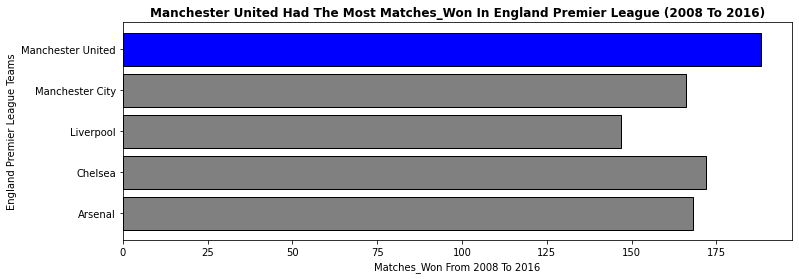

In [65]:
# Plot bar chart for top 5 teams, by matches won, in the EPL

myBarPlot(counts_wins_top5, "England Premier League", 'matches_won')

###### Top 5 teams with the most wins in the Spanish La Liga

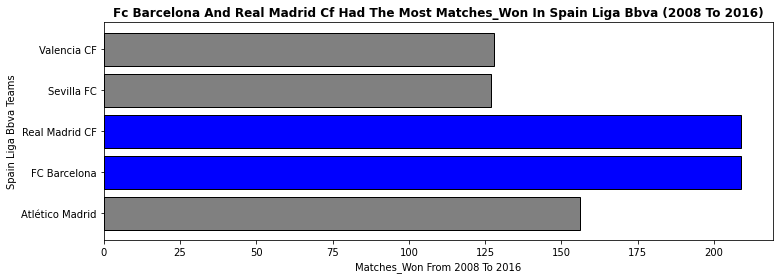

In [66]:
# Plot bar chart for top 5 teams, by matches won, in the La Liga

myBarPlot(counts_wins_top5, "Spain LIGA BBVA", 'matches_won')

###### Top 5 teams with the most wins in the German Bundesliga

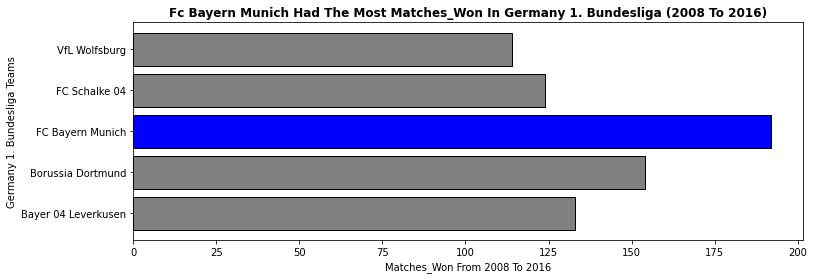

In [67]:
# Plot bar chart for top 5 teams, by matches won, in the Bundesliga

myBarPlot(counts_wins_top5, "Germany 1. Bundesliga", 'matches_won')

###### Top 5 teams with the most wins in the Italian Serie A

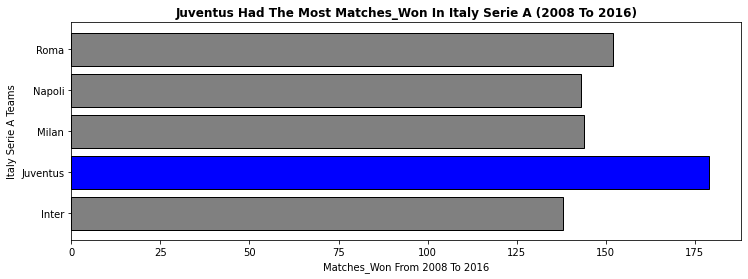

In [68]:
# Plot bar chart for top 5 teams, by matches won, in Italy Serie A

myBarPlot(counts_wins_top5, "Italy Serie A", 'matches_won')

###### Top 5 best winning teams in the French Ligue 1

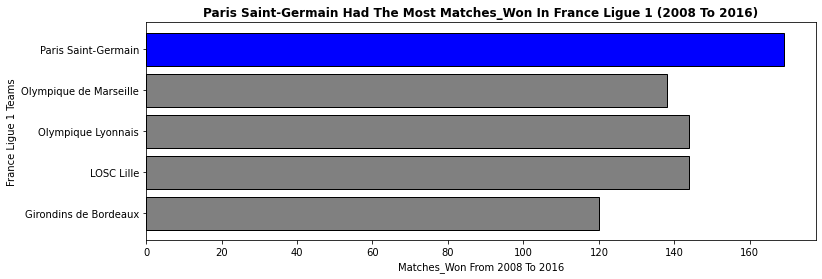

In [69]:
# Plot bar chart for top 5 teams, by matches won, in France Ligue 1

myBarPlot(counts_wins_top5, "France Ligue 1", 'matches_won')

<h3 align="center"> What team had the most goals in each league from 2008 to 2015? </h3> 

#### Build a goals_scored table for teams

In [70]:
# Create total goals table

# First, select goals scored at home
home_goals_scored = df_match_mrg[['match_id', 'date', 'season', 'home_team', 'home_team_api_id', 'home_team_goal', 'league']]

# Next, select goals scored away
away_goals_scored = df_match_mrg[['match_id', 'date', 'season', 'away_team', 'away_team_api_id', 'away_team_goal', 'league']]

# Ensure that both home_goals and away_goals have similar column names so we can append them
home_goals_scored.rename(columns={'home_team' : 'team', 'home_team_api_id' : 'team_id', 'home_team_goal':'goal'}, inplace = True)
away_goals_scored.rename(columns={'away_team' : 'team', 'away_team_api_id' : 'team_id', 'away_team_goal':'goal'}, inplace = True)

# Then, append home_goals and away_goals to create total_goals table
total_goals_scored = pd.concat([home_goals_scored, away_goals_scored], ignore_index=True)

# Finally, create goals_scored_df table by grouping total_goals_scored by team, season, and league
goals_scored_df = total_goals_scored.groupby(['team', 'team_id', 'season', 'league'])['goal'].sum()\
                        .reset_index(name='goals_scored')

# Examine team_goals table
goals_scored_df.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


team  team_id     season                 league  \
0  1. FC Kaiserslautern     8350  2010/2011  Germany 1. Bundesliga   
1  1. FC Kaiserslautern     8350  2011/2012  Germany 1. Bundesliga   
2            1. FC Köln     8722  2008/2009  Germany 1. Bundesliga   
3            1. FC Köln     8722  2009/2010  Germany 1. Bundesliga   
4            1. FC Köln     8722  2010/2011  Germany 1. Bundesliga   

   goals_scored  
0            45  
1            24  
2            30  
3            32  
4            47

In [71]:
# Select the top 5 teams, by goals scored, for all leagues. 

# 1. Total goals scored, from 2008 to 2016, per team in each league
counts_goals = goals_scored_df.pivot_table(index=['league', 'team'], values=['goals_scored'], aggfunc=sum)

# 2. Get the top 5 teams, by goals scored, per league
counts_goals_top5 = counts_goals.groupby('league')['goals_scored'].nlargest(5).reset_index(0, drop=True).reset_index().set_index('league')

counts_goals_top5.head(10)

team  goals_scored
league                                                 
Belgium Jupiler League     Club Brugge KV           335
Belgium Jupiler League     RSC Anderlecht           328
Belgium Jupiler League           KAA Gent           285
Belgium Jupiler League           KRC Genk           258
Belgium Jupiler League  Standard de Liège           240
England Premier League            Chelsea           575
England Premier League  Manchester United           572
England Premier League    Manchester City           571
England Premier League            Arsenal           566
England Premier League          Liverpool           521

###### Top 5 goal scoring teams in the English Premier League

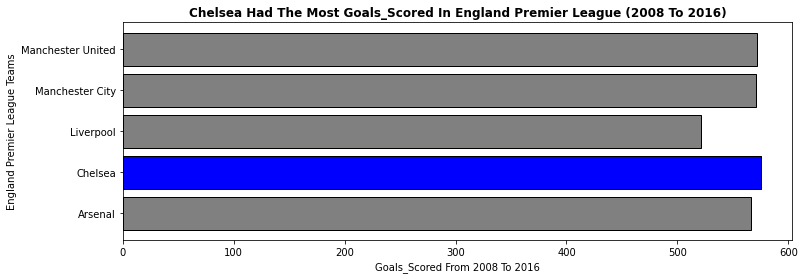

In [72]:
# Plot bar chart for top 5 teams, by goals scored, in the EPL

myBarPlot(counts_goals_top5, "England Premier League", 'goals_scored')

It is interesting to note that the team that scored the most goals across the period isn't the team that had the most wins.

###### Top 5 goal scoring teams in Spain's La Liga

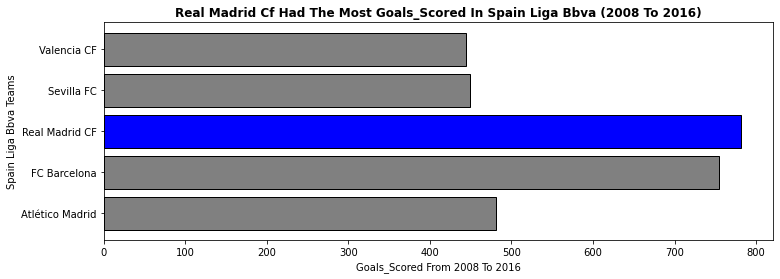

In [73]:
# Plot bar chart for top 5 teams, by goals scored, in the La Liga

myBarPlot(counts_goals_top5, "Spain LIGA BBVA", 'goals_scored')

We'll recall that Real Madrid and Barcelona were top two for most wins across the period (2008 to 2015)

###### Top 5 goal scoring teams in the German Bundesliga

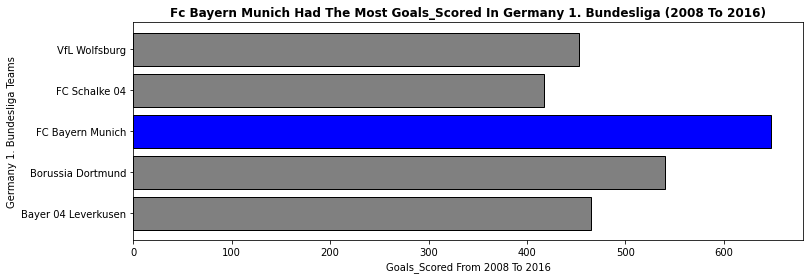

In [74]:
# Plot bar chart for top 5 teams, by goals scored, in the Bundesliga

myBarPlot(counts_goals_top5, "Germany 1. Bundesliga", 'goals_scored')

###### Top 5 goal scoring teams in the Italian Serie A

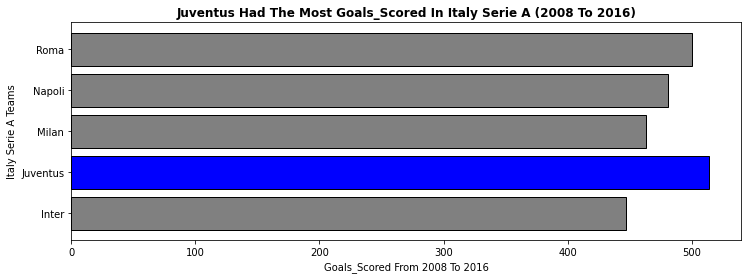

In [75]:
# Plot bar chart for top 5 teams, by goals scored, in Italy Serie A

myBarPlot(counts_goals_top5, "Italy Serie A", 'goals_scored')

###### Top 5 goal scoring teams in the French Ligue 1

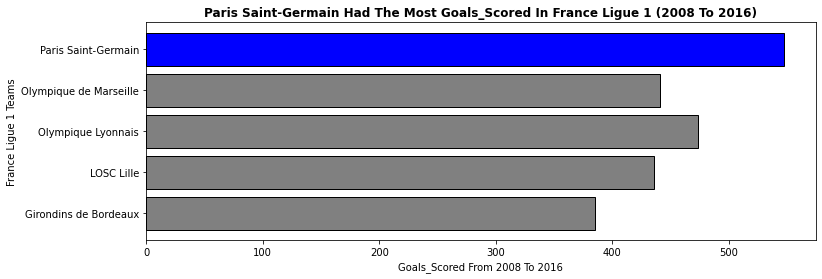

In [76]:
# Plot bar chart for top 5 teams, by goals scored, in French Ligue 1

myBarPlot(counts_goals_top5, "France Ligue 1", 'goals_scored')

The same teams that had the most wins also scored the most goals, except in the EPL where Man Utd beat Chelsea to the most wins while being outscored by Chelsea.

## Research Question 2  - What teams improved the most in goal scoring over the time period?

#### Average Team Goals per Season From 2008 to 2015

In [77]:
# 1. Get the goal scoring average per season
avg_goals_scored_df = total_goals_scored.groupby(['season', 'league', 'team'])['goal'].mean()\
                        .reset_index(name='scored_avg')

# 2. Get the ratio of the final season scoring average to first season scoring average
avg_goals_0809 = avg_goals_scored_df.query('season == "2008/2009"')
avg_goals_1516 = avg_goals_scored_df.query('season == "2015/2016"')

first_last_season_avg = avg_goals_0809.merge(avg_goals_1516, on='team', suffixes=('_08/09', '_15/16'))

first_last_season_avg.drop(['league_15/16', 'season_15/16'], axis=1, inplace=True)

first_last_season_avg.rename(columns={'league_08/09' : 'league'}, inplace=True)

first_last_season_avg['goal_ratio'] = first_last_season_avg['scored_avg_15/16'] / first_last_season_avg['scored_avg_08/09'] 

first_last_season_avg

season_08/09                    league                     team  \
0      2008/2009    Belgium Jupiler League           Club Brugge KV   
1      2008/2009    Belgium Jupiler League                 KAA Gent   
2      2008/2009    Belgium Jupiler League                 KRC Genk   
3      2008/2009    Belgium Jupiler League              KV Mechelen   
4      2008/2009    Belgium Jupiler League             KVC Westerlo   
..           ...                       ...                      ...   
107    2008/2009  Switzerland Super League                FC Luzern   
108    2008/2009  Switzerland Super League                  FC Sion   
109    2008/2009  Switzerland Super League                 FC Vaduz   
110    2008/2009  Switzerland Super League                FC Zürich   
111    2008/2009  Switzerland Super League  Grasshopper Club Zürich   

     scored_avg_08/09  scored_avg_15/16  goal_ratio  
0            1.000000          2.133333    2.133333  
1            1.500000          1.862069    1.241379  
2            0.750000          1.344828    1.793103  
3            1.333333          1.620690    1.215517  
4            1.000000          1.172414    1.172414  
..                ...               ...         ...  
107          1.333333          1.647059    1.235294  
108          1.250000          1.500000    1.200000  
109          3.000000          1.250000    0.416667  
110          2.300000          1.264706    0.549872  
111          1.666667          1.705882    1.023529  

[112 rows x 6 columns]

###### Top 5 Most Improved Teams in the EPL

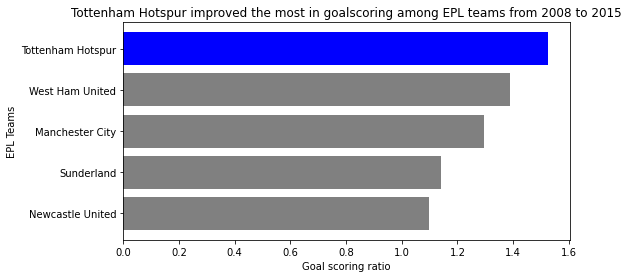

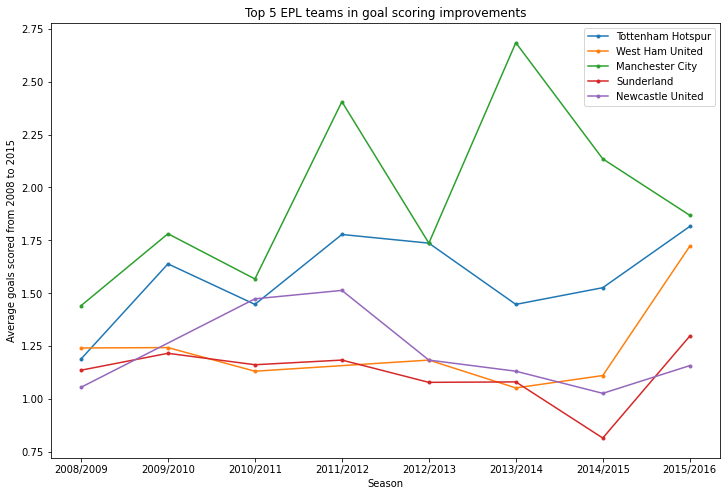

In [78]:
# Select top 5 best improved teams in the La Liga from 2008 to 2015 (goal scored category)

epl_t5goal = first_last_season_avg.query('league == "England Premier League"')\
                     .nlargest(5, 'goal_ratio')\
                     .reset_index()\
                     [['team', 'goal_ratio']]

# Bar chart of the most improved EPL team (goalscoring)
epl_t5g_x = epl_t5goal['team']
epl_t5g_y = epl_t5goal['goal_ratio']

colors = ['grey' if (i < max(epl_t5g_y)) else 'blue' for i in epl_t5g_y]

fig, ax = plt.subplots(figsize=(8,4))

ax.barh(epl_t5g_x, epl_t5g_y, label='Number of Matches Won', color=colors)
ax.set_ylabel('EPL Teams')
ax.set_xlabel('Goal scoring ratio')
ax.set_title('Tottenham Hotspur improved the most in goalscoring among EPL teams from 2008 to 2015')

plt.gca().invert_yaxis() # Display highest first

plt.show()


# Line chart showing improvement in goal-scoring across the seasons
fig, ax = plt.subplots(figsize=(12,8))

legend = []

for i in range(5):
    team = avg_goals_scored_df.query('team == "{}"'.format(epl_t5goal.iloc[i,0]))
    
    team.sort_values(by='season')
    
    ax.plot(team.loc[:,'season'], team.loc[:,'scored_avg'], ls='solid', marker='.')
    
    legend.append(team.iloc[0,2])

plt.title('Top 5 EPL teams in goal scoring improvements')
plt.xlabel('Season')
plt.ylabel('Average goals scored from 2008 to 2015')

plt.legend(legend)

plt.show()

###### Top 5 Most Improved Teams in the Spanish La Liga

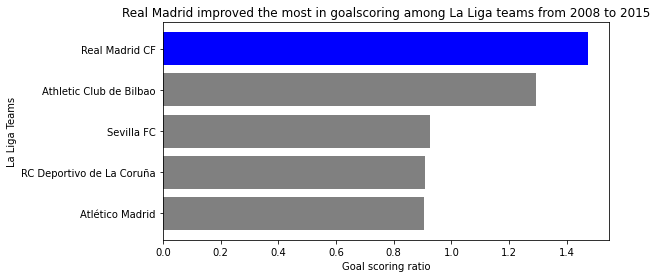

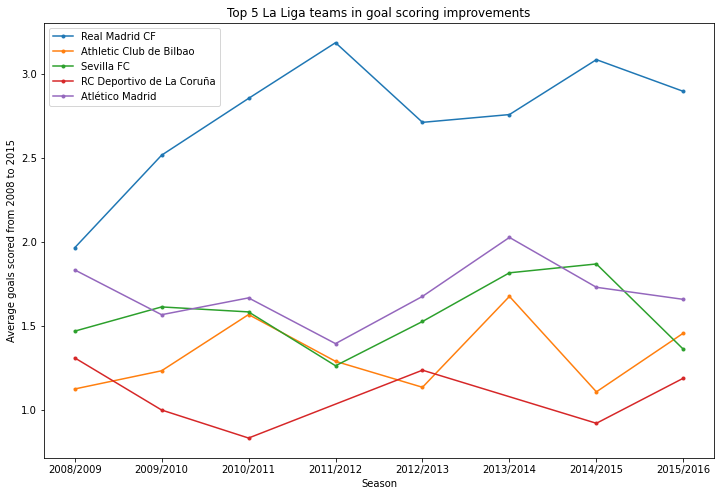

In [79]:
# Select top 5 best improved teams in the La Liga from 2008 to 2015 (goal scored category)

ll_t5goal = first_last_season_avg.query('league == "Spain LIGA BBVA"')\
                     .nlargest(5, 'goal_ratio')\
                     .reset_index()\
                     [['team', 'goal_ratio']]

# Bar chart of the most improved La Liga team (goalscoring)
ll_t5g_x = ll_t5goal['team']
ll_t5g_y = ll_t5goal['goal_ratio']

colors = ['grey' if (i < max(ll_t5g_y)) else 'blue' for i in ll_t5g_y]

fig, ax = plt.subplots(figsize=(8,4))

ax.barh(ll_t5g_x, ll_t5g_y, label='Number of Matches Won', color=colors)
ax.set_ylabel('La Liga Teams')
ax.set_xlabel('Goal scoring ratio')
ax.set_title('Real Madrid improved the most in goalscoring among La Liga teams from 2008 to 2015')

plt.gca().invert_yaxis() # Display highest first

plt.show()


# Line chart showing improvement in goal-scoring across the seasons
fig, ax = plt.subplots(figsize=(12,8))

legend = []

for i in range(5):
    team = avg_goals_scored_df.query('team == "{}"'.format(ll_t5goal.iloc[i,0]))
    
    team.sort_values(by='season')
    
    ax.plot(team.loc[:,'season'], team.loc[:,'scored_avg'], ls='solid', marker='.')
    
    legend.append(team.iloc[0,2])

plt.title('Top 5 La Liga teams in goal scoring improvements')
plt.xlabel('Season')
plt.ylabel('Average goals scored from 2008 to 2015')


plt.legend(legend)

plt.show()

###### Top 5 Most Improved Teams in the German Bundesliga

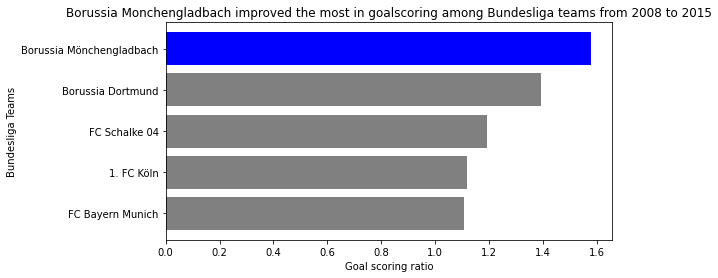

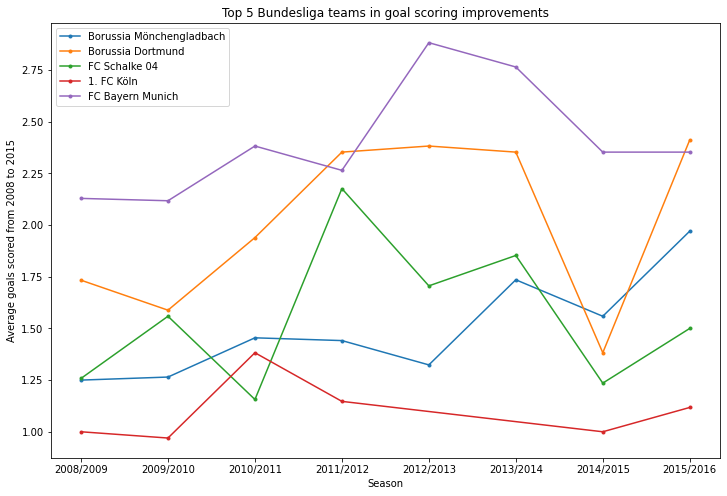

In [80]:
# Select top 5 best improved teams in the Bundesliga from 2008 to 2015 (goal scored category)

bl_t5goal = first_last_season_avg.query('league == "Germany 1. Bundesliga"')\
                     .nlargest(5, 'goal_ratio')\
                     .reset_index()\
                     [['team', 'goal_ratio']]

# Bar chart of the most improved Bundesliga team (goalscoring)
bl_t5g_x = bl_t5goal['team']
bl_t5g_y = bl_t5goal['goal_ratio']

colors = ['grey' if (i < max(bl_t5g_y)) else 'blue' for i in bl_t5g_y]

fig, ax = plt.subplots(figsize=(8,4))

ax.barh(bl_t5g_x, bl_t5g_y, label='Number of Matches Won', color=colors)
ax.set_ylabel('Bundesliga Teams')
ax.set_xlabel('Goal scoring ratio')
ax.set_title('Borussia Monchengladbach improved the most in goalscoring among Bundesliga teams from 2008 to 2015')

plt.gca().invert_yaxis() # Display highest first

plt.show()


# Line chart showing improvement in goal-scoring across the seasons
fig, ax = plt.subplots(figsize=(12,8))

legend = []

for i in range(5):
    team = avg_goals_scored_df.query('team == "{}"'.format(bl_t5goal.iloc[i,0]))
    
    team.sort_values(by='season')
    
    ax.plot(team.loc[:,'season'], team.loc[:,'scored_avg'], ls='solid', marker='.')
    
    legend.append(team.iloc[0,2])

plt.title('Top 5 Bundesliga teams in goal scoring improvements')
plt.xlabel('Season')
plt.ylabel('Average goals scored from 2008 to 2015')


plt.legend(legend)

plt.show()

###### Top 5 Most Improved Teams in the Italian Serie A

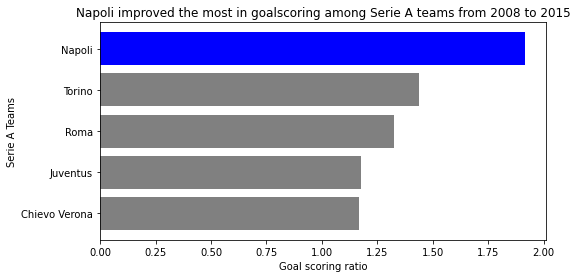

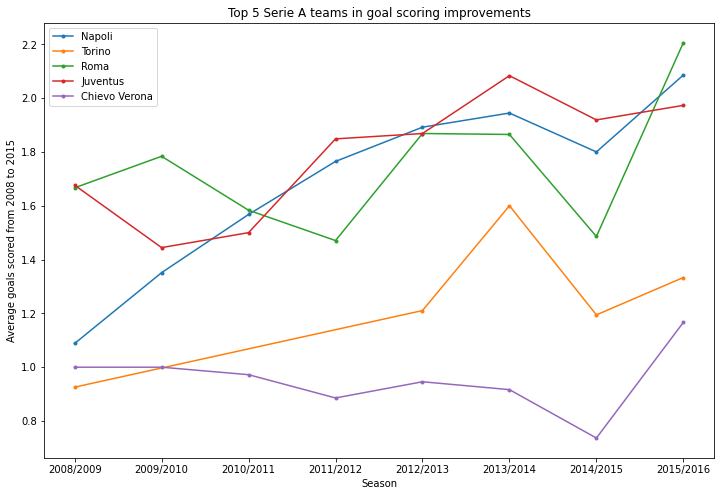

In [81]:
# Select top 5 best improved teams in the Serie A from 2008 to 2015 (goal scored category)

sa_t5goal = first_last_season_avg.query('league == "Italy Serie A"')\
                     .nlargest(5, 'goal_ratio')\
                     .reset_index()\
                     [['team', 'goal_ratio']]

# Bar chart of the most improved Serie A team (goalscoring)
sa_t5g_x = sa_t5goal['team']
sa_t5g_y = sa_t5goal['goal_ratio']

colors = ['grey' if (i < max(sa_t5g_y)) else 'blue' for i in sa_t5g_y]

fig, ax = plt.subplots(figsize=(8,4))

ax.barh(sa_t5g_x, sa_t5g_y, label='Number of Matches Won', color=colors)
ax.set_ylabel('Serie A Teams')
ax.set_xlabel('Goal scoring ratio')
ax.set_title('Napoli improved the most in goalscoring among Serie A teams from 2008 to 2015')

plt.gca().invert_yaxis() # Display highest first

plt.show()


# Line chart showing improvement in goal-scoring across the seasons
fig, ax = plt.subplots(figsize=(12,8))

legend = []

for i in range(5):
    team = avg_goals_scored_df.query('team == "{}"'.format(sa_t5goal.iloc[i,0]))
    
    team.sort_values(by='season')
    
    ax.plot(team.loc[:,'season'], team.loc[:,'scored_avg'], ls='solid', marker='.')
    
    legend.append(team.iloc[0,2])

plt.title('Top 5 Serie A teams in goal scoring improvements')
plt.xlabel('Season')
plt.ylabel('Average goals scored from 2008 to 2015')


plt.legend(legend)

plt.show()

###### Top 5 Most Improved Teams in the French Ligue 1

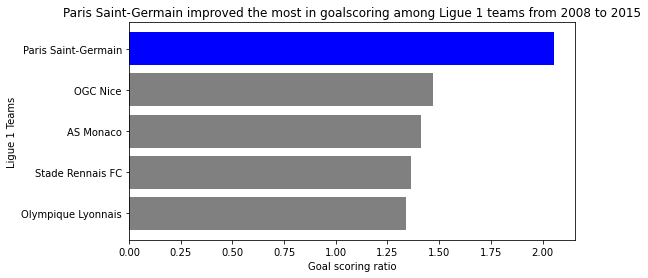

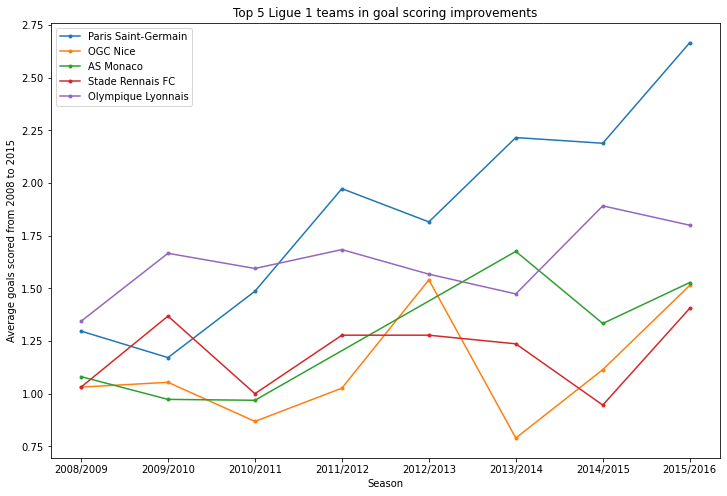

In [82]:
# Select top 5 best improved teams in the French Ligue 1 from 2008 to 2015 (goal scored category)

l1_t5goal = first_last_season_avg.query('league == "France Ligue 1"')\
                     .nlargest(5, 'goal_ratio')\
                     .reset_index()\
                     [['team', 'goal_ratio']]

# Bar chart of the most improved Ligue 1 team (goalscoring)
l1_t5g_x = l1_t5goal['team']
l1_t5g_y = l1_t5goal['goal_ratio']

colors = ['grey' if (i < max(l1_t5g_y)) else 'blue' for i in l1_t5g_y]

fig, ax = plt.subplots(figsize=(8,4))

ax.barh(l1_t5g_x, l1_t5g_y, label='Number of Matches Won', color=colors)
ax.set_ylabel('Ligue 1 Teams')
ax.set_xlabel('Goal scoring ratio')
ax.set_title('Paris Saint-Germain improved the most in goalscoring among Ligue 1 teams from 2008 to 2015')

plt.gca().invert_yaxis() # Display highest first

plt.show()


# Line chart showing improvement in goal-scoring across the seasons
fig, ax = plt.subplots(figsize=(12,8))

legend = []

for i in range(5):
    team = avg_goals_scored_df.query('team == "{}"'.format(l1_t5goal.iloc[i,0]))
    
    team.sort_values(by='season')
    
    ax.plot(team.loc[:,'season'], team.loc[:,'scored_avg'], ls='solid', marker='.')
    
    legend.append(team.iloc[0,2])

plt.title('Top 5 Ligue 1 teams in goal scoring improvements')
plt.xlabel('Season')
plt.ylabel('Average goals scored from 2008 to 2015')


plt.legend(legend)

plt.show()

### What team attributes led to the most victories?

First step is to merge team performance with team attributes

In [83]:
# Create a total goals table with year column
total_goals_w_year = total_goals_scored

total_goals_w_year['year'] = total_goals_w_year['date'].dt.year


# Create goals table with year column (it will be one of the columns we join on)
goals_for_att = total_goals_w_year.groupby(['team', 'team_id', 'league', 'year'])['goal'].sum()\
                        .reset_index(name='goals_scored')

# Create year column in df_team_mrg
df_team_mrg['year'] = df_team_mrg['date'].dt.year

# Now, merge both tables on team_api_id and year
goals_team_att = pd.merge(goals_for_att, df_team_mrg, left_on=['team_id', 'year'], right_on=['team_api_id', 'year'])

# Drop unwanted columns from goals_team_att
goals_team_att.drop(['date', 'id', 'team_api_id', 'team_long_name'], axis=1, inplace=True)

# Rearrange the columns
goals_team_att = goals_team_att.reindex(columns=['team_id', 'team', 'league', 'year', 'goals_scored', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass', 'buildUpPlayPassing', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 'chanceCreationPassing', 'chanceCreationPassingClass', 'chanceCreationCrossing', 'chanceCreationCrossingClass', 'chanceCreationShooting', 'chanceCreationShootingClass', 'chanceCreationPositioningClass', 'defencePressure', 'defencePressureClass', 'defenceAggression', 'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass'])

goals_team_att.head()

team_id                  team                 league  year  goals_scored  \
0     8350  1. FC Kaiserslautern  Germany 1. Bundesliga  2010            24   
1     8350  1. FC Kaiserslautern  Germany 1. Bundesliga  2011            34   
2     8350  1. FC Kaiserslautern  Germany 1. Bundesliga  2012            11   
3     8722            1. FC Köln  Germany 1. Bundesliga  2010            41   
4     8722            1. FC Köln  Germany 1. Bundesliga  2011            56   

   buildUpPlaySpeed buildUpPlaySpeedClass  buildUpPlayPassing  \
0                45              Balanced                  55   
1                48              Balanced                  42   
2                38              Balanced                  54   
3                55              Balanced                  65   
4                58              Balanced                  71   

  buildUpPlayPassingClass buildUpPlayPositioningClass  chanceCreationPassing  \
0                   Mixed                   Organised                     45   
1                   Mixed                   Organised                     49   
2                   Mixed                   Organised                     43   
3                   Mixed                   Organised                     65   
4                    Long                   Organised                     42   

  chanceCreationPassingClass  chanceCreationCrossing  \
0                     Normal                      70   
1                     Normal                      68   
2                     Normal                      49   
3                     Normal                      40   
4                     Normal                      39   

  chanceCreationCrossingClass  chanceCreationShooting  \
0                        Lots                      70   
1                        Lots                      53   
2                      Normal                      64   
3                      Normal                      60   
4                      Normal                      50   

  chanceCreationShootingClass chanceCreationPositioningClass  defencePressure  \
0                        Lots                      Organised               70   
1                      Normal                      Organised               38   
2                      Normal                      Organised               37   
3                      Normal                      Organised               45   
4                      Normal                      Organised               40   

  defencePressureClass  defenceAggression defenceAggressionClass  \
0                 High                 70                 Double   
1               Medium                 48                  Press   
2               Medium                 51                  Press   
3               Medium                 55                  Press   
4               Medium                 40                  Press   

   defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass  
0                70                  Wide                    Cover  
1                53                Normal                    Cover  
2                53                Normal                    Cover  
3                70                  Wide                    Cover  
4                56                Normal                    Cover

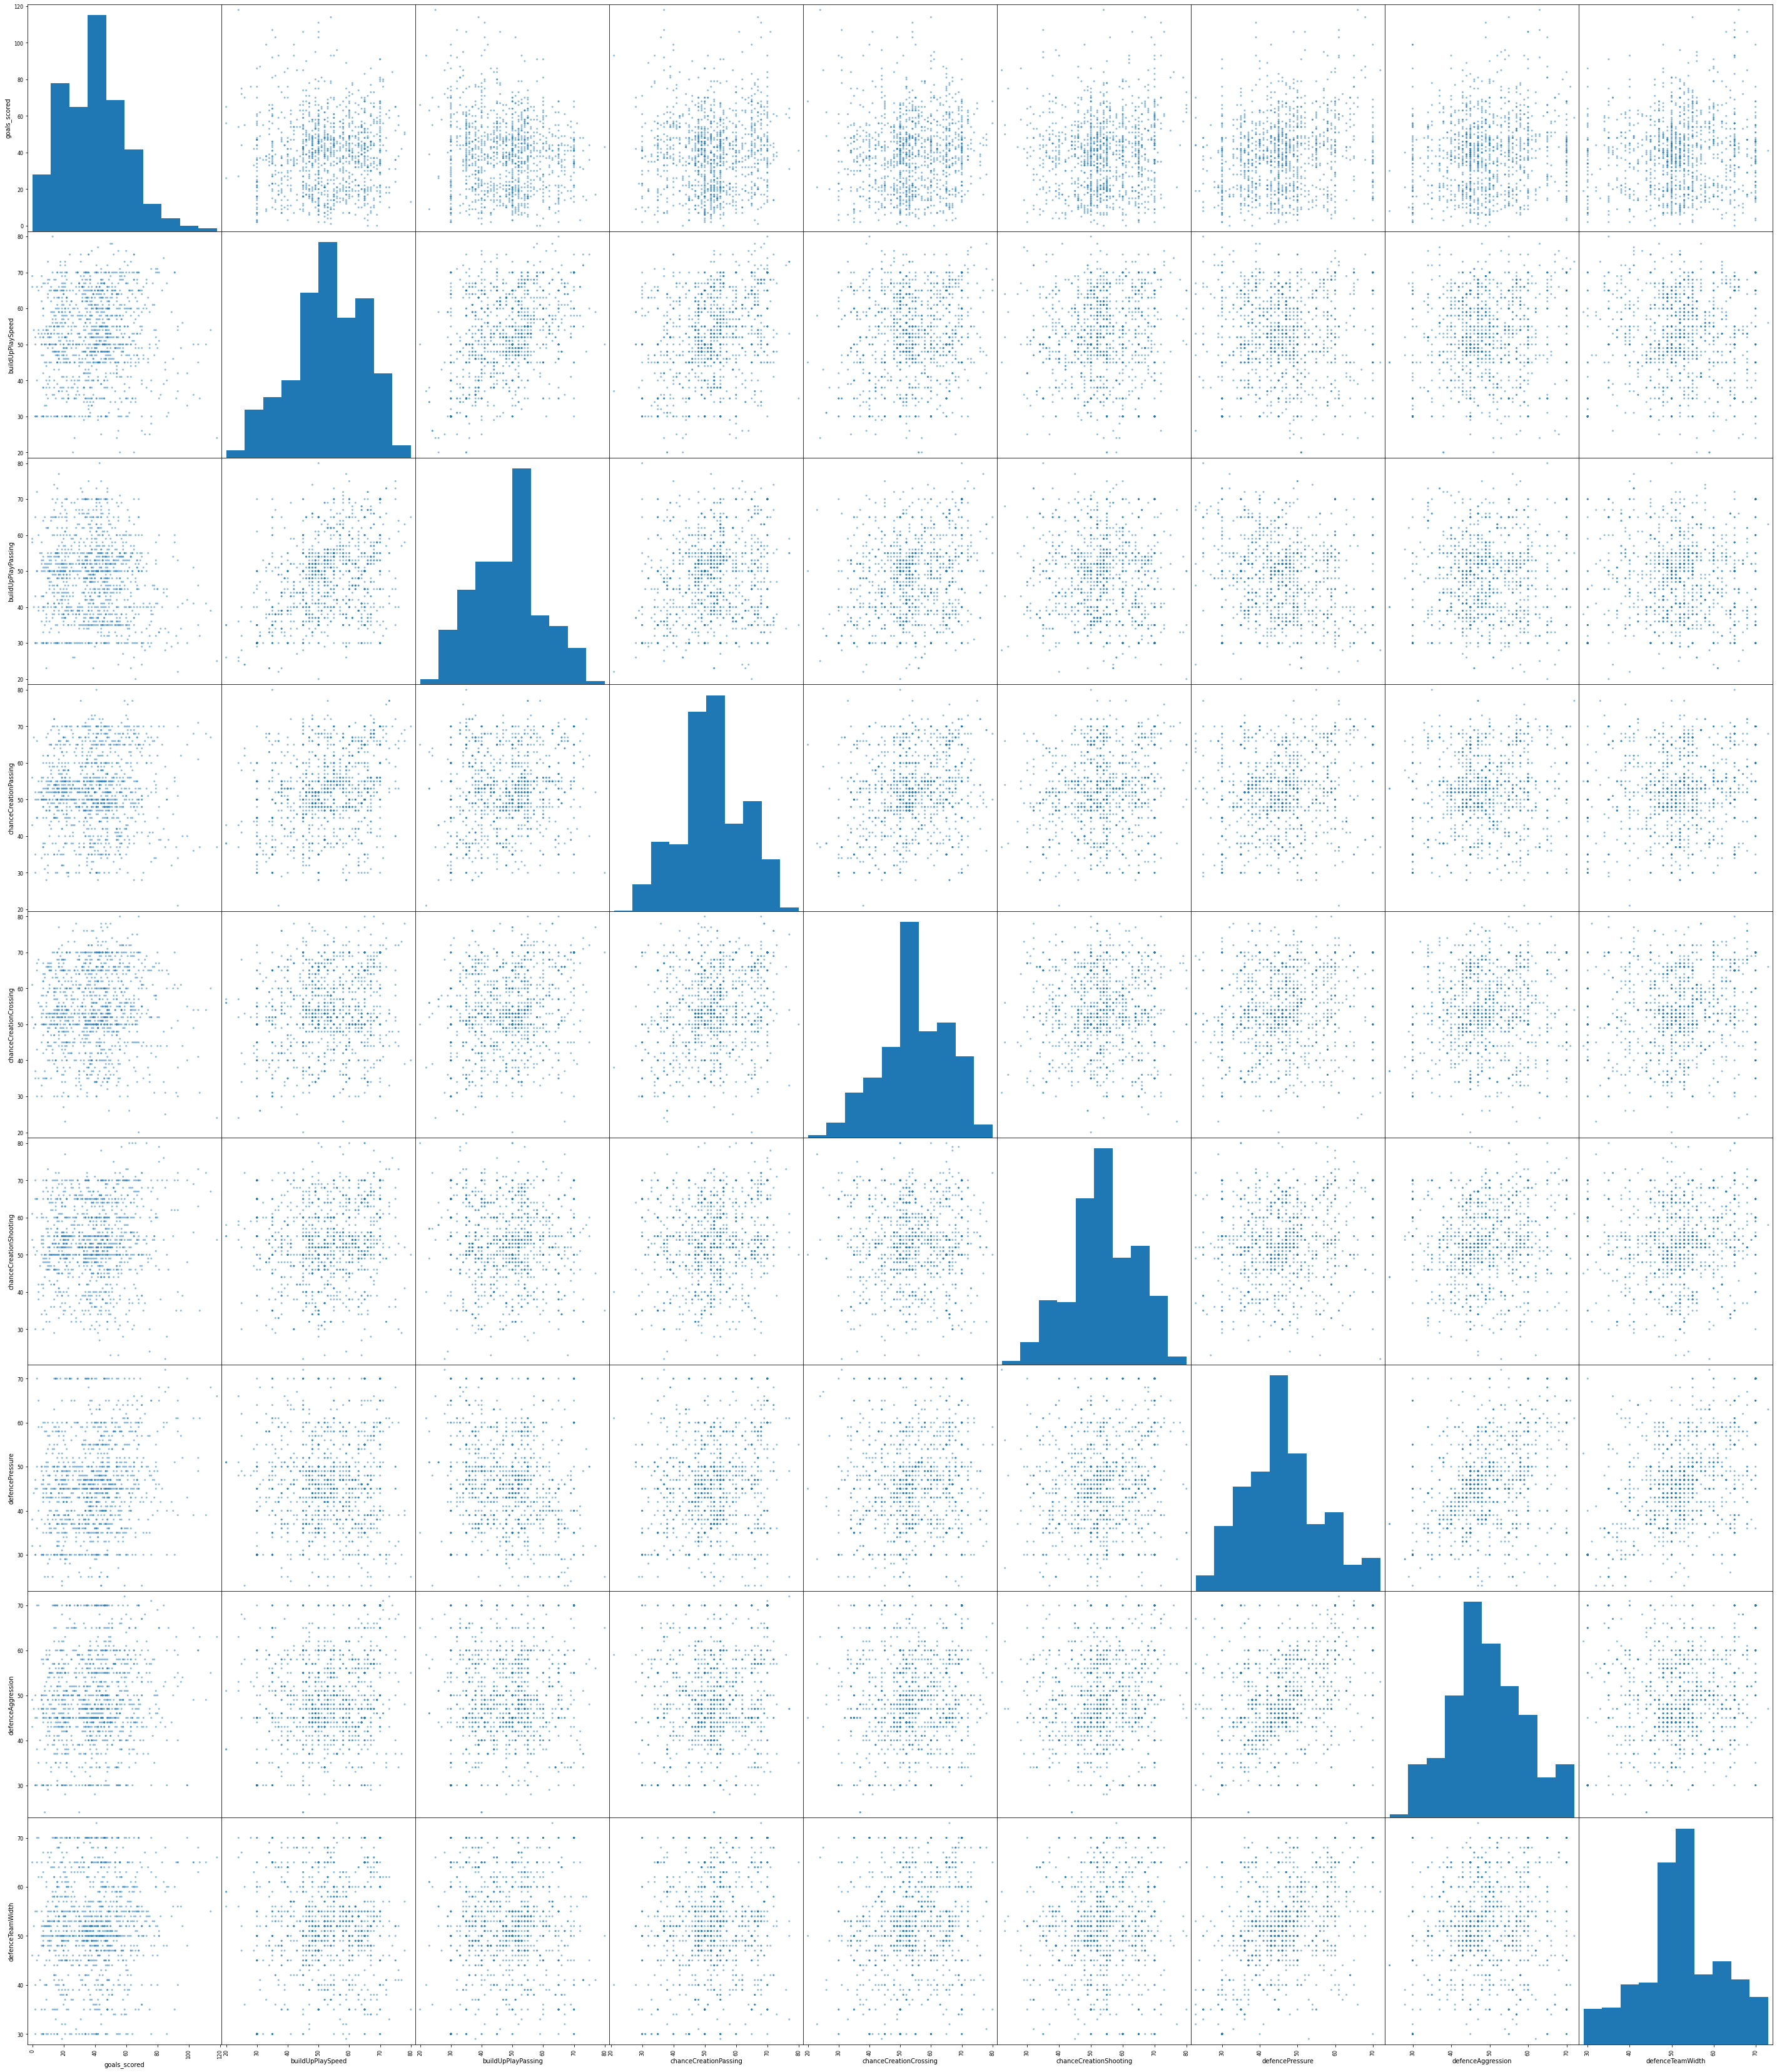

In [84]:
# Let's see a scatter matrix of the team attributes on goals scored
pd.plotting.scatter_matrix(goals_team_att.drop(columns = ['team_id', 'year']), figsize=(50,60));

Viewing the scatterplots, there doesn't appear to be any correlation between the team attributes and goals scored.

In [85]:
# Examine the correlation between goal_scored and team attributes
goals_team_att.corr()

team_id      year  goals_scored  buildUpPlaySpeed  \
team_id                 1.000000  0.046029     -0.056082          0.053257   
year                    0.046029  1.000000     -0.003642          0.076906   
goals_scored           -0.056082 -0.003642      1.000000          0.025138   
buildUpPlaySpeed        0.053257  0.076906      0.025138          1.000000   
buildUpPlayPassing      0.031635  0.060267     -0.119418          0.393648   
chanceCreationPassing  -0.006986  0.012406      0.050240          0.309676   
chanceCreationCrossing -0.041175 -0.064909      0.044310          0.159948   
chanceCreationShooting -0.059685 -0.299817      0.088154          0.102695   
defencePressure        -0.079325 -0.089332      0.190962          0.070050   
defenceAggression      -0.024017 -0.086376      0.121332          0.209906   
defenceTeamWidth       -0.091571 -0.045035      0.082233          0.081848   

                        buildUpPlayPassing  chanceCreationPassing  \
team_id                           0.031635              -0.006986   
year                              0.060267               0.012406   
goals_scored                     -0.119418               0.050240   
buildUpPlaySpeed                  0.393648               0.309676   
buildUpPlayPassing                1.000000               0.178024   
chanceCreationPassing             0.178024               1.000000   
chanceCreationCrossing            0.224154               0.242995   
chanceCreationShooting           -0.082824               0.157932   
defencePressure                  -0.089667               0.200345   
defenceAggression                 0.141802               0.170347   
defenceTeamWidth                  0.023434               0.135207   

                        chanceCreationCrossing  chanceCreationShooting  \
team_id                              -0.041175               -0.059685   
year                                 -0.064909               -0.299817   
goals_scored                          0.044310                0.088154   
buildUpPlaySpeed                      0.159948                0.102695   
buildUpPlayPassing                    0.224154               -0.082824   
chanceCreationPassing                 0.242995                0.157932   
chanceCreationCrossing                1.000000                0.021501   
chanceCreationShooting                0.021501                1.000000   
defencePressure                       0.102319                0.167084   
defenceAggression                     0.132359                0.090075   
defenceTeamWidth                      0.147107                0.127877   

                        defencePressure  defenceAggression  defenceTeamWidth  
team_id                       -0.079325          -0.024017         -0.091571  
year                          -0.089332          -0.086376         -0.045035  
goals_scored                   0.190962           0.121332          0.082233  
buildUpPlaySpeed               0.070050           0.209906          0.081848  
buildUpPlayPassing            -0.089667           0.141802          0.023434  
chanceCreationPassing          0.200345           0.170347          0.135207  
chanceCreationCrossing         0.102319           0.132359          0.147107  
chanceCreationShooting         0.167084           0.090075          0.127877  
defencePressure                1.000000           0.414319          0.508416  
defenceAggression              0.414319           1.000000          0.245708  
defenceTeamWidth               0.508416           0.245708          1.000000

Yes, team attributes all seem to be **very weakly** correlated with goals_scored. The closest being defencePressure with a correlation coefficient of 0.19.

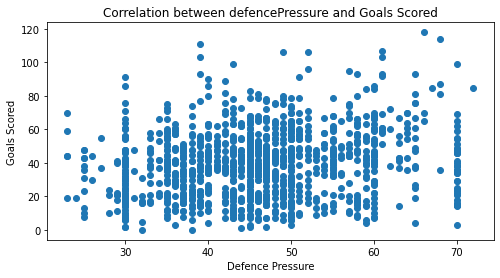

In [86]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(goals_team_att['defencePressure'], goals_team_att['goals_scored'])

plt.title('Correlation between defencePressure and Goals Scored')
plt.xlabel('Defence Pressure')
plt.ylabel('Goals Scored')
plt.show()

defencePressure is **very weakly** correlated with goals_scored

### What team attributes led to the most goals?

First, make wins table with team attributes

In [87]:
# Create a total wins table with year column
total_wins_w_year = total_wins

total_wins_w_year['year'] = total_wins_w_year['date'].dt.year

total_wins_w_year.head()

# Create wins table with year column (it will be one of the columns we join on)
wins_for_att = total_wins_w_year.groupby(['team_id', 'team', 'league', 'year'])['match_id'].count()\
                         .reset_index(name='matches_won')

# Now, merge both tables on team_api_id and year
wins_team_att = pd.merge(wins_for_att, df_team_mrg, left_on=['team_id', 'year'], right_on=['team_api_id', 'year'])

# Drop unwanted columns from wins_team_att
wins_team_att.drop(['date', 'id', 'team_api_id', 'team_long_name'], axis=1, inplace=True)

# Rearrange the columns
wins_team_att = wins_team_att.reindex(columns=['team_id', 'team', 'league', 'year', 'matches_won', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass', 'buildUpPlayPassing', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 'chanceCreationPassing', 'chanceCreationPassingClass', 'chanceCreationCrossing', 'chanceCreationCrossingClass', 'chanceCreationShooting', 'chanceCreationShootingClass', 'chanceCreationPositioningClass', 'defencePressure', 'defencePressureClass', 'defenceAggression', 'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass'])

wins_team_att.head()

team_id                 team                  league  year  matches_won  \
0     1601         Ruch Chorzów      Poland Ekstraklasa  2013            3   
1     1601         Ruch Chorzów      Poland Ekstraklasa  2014            7   
2     1601         Ruch Chorzów      Poland Ekstraklasa  2015           12   
3     1773  Oud-Heverlee Leuven  Belgium Jupiler League  2012            7   
4     1773  Oud-Heverlee Leuven  Belgium Jupiler League  2013            2   

   buildUpPlaySpeed buildUpPlaySpeedClass  buildUpPlayPassing  \
0                53              Balanced                  55   
1                53              Balanced                  38   
2                47              Balanced                  38   
3                52              Balanced                  50   
4                52              Balanced                  50   

  buildUpPlayPassingClass buildUpPlayPositioningClass  chanceCreationPassing  \
0                   Mixed                   Organised                     44   
1                   Mixed                   Organised                     66   
2                   Mixed                   Organised                     61   
3                   Mixed                   Organised                     50   
4                   Mixed                   Organised                     50   

  chanceCreationPassingClass  chanceCreationCrossing  \
0                     Normal                      65   
1                     Normal                      65   
2                     Normal                      65   
3                     Normal                      53   
4                     Normal                      53   

  chanceCreationCrossingClass  chanceCreationShooting  \
0                      Normal                      50   
1                      Normal                      50   
2                      Normal                      50   
3                      Normal                      54   
4                      Normal                      54   

  chanceCreationShootingClass chanceCreationPositioningClass  defencePressure  \
0                      Normal                      Organised               43   
1                      Normal                      Organised               43   
2                      Normal                      Organised               43   
3                      Normal                      Organised               43   
4                      Normal                      Organised               43   

  defencePressureClass  defenceAggression defenceAggressionClass  \
0               Medium                 44                  Press   
1               Medium                 44                  Press   
2               Medium                 44                  Press   
3               Medium                 44                  Press   
4               Medium                 44                  Press   

   defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass  
0                49                Normal                    Cover  
1                49                Normal                    Cover  
2                49                Normal                    Cover  
3                50                Normal                    Cover  
4                50                Normal                    Cover

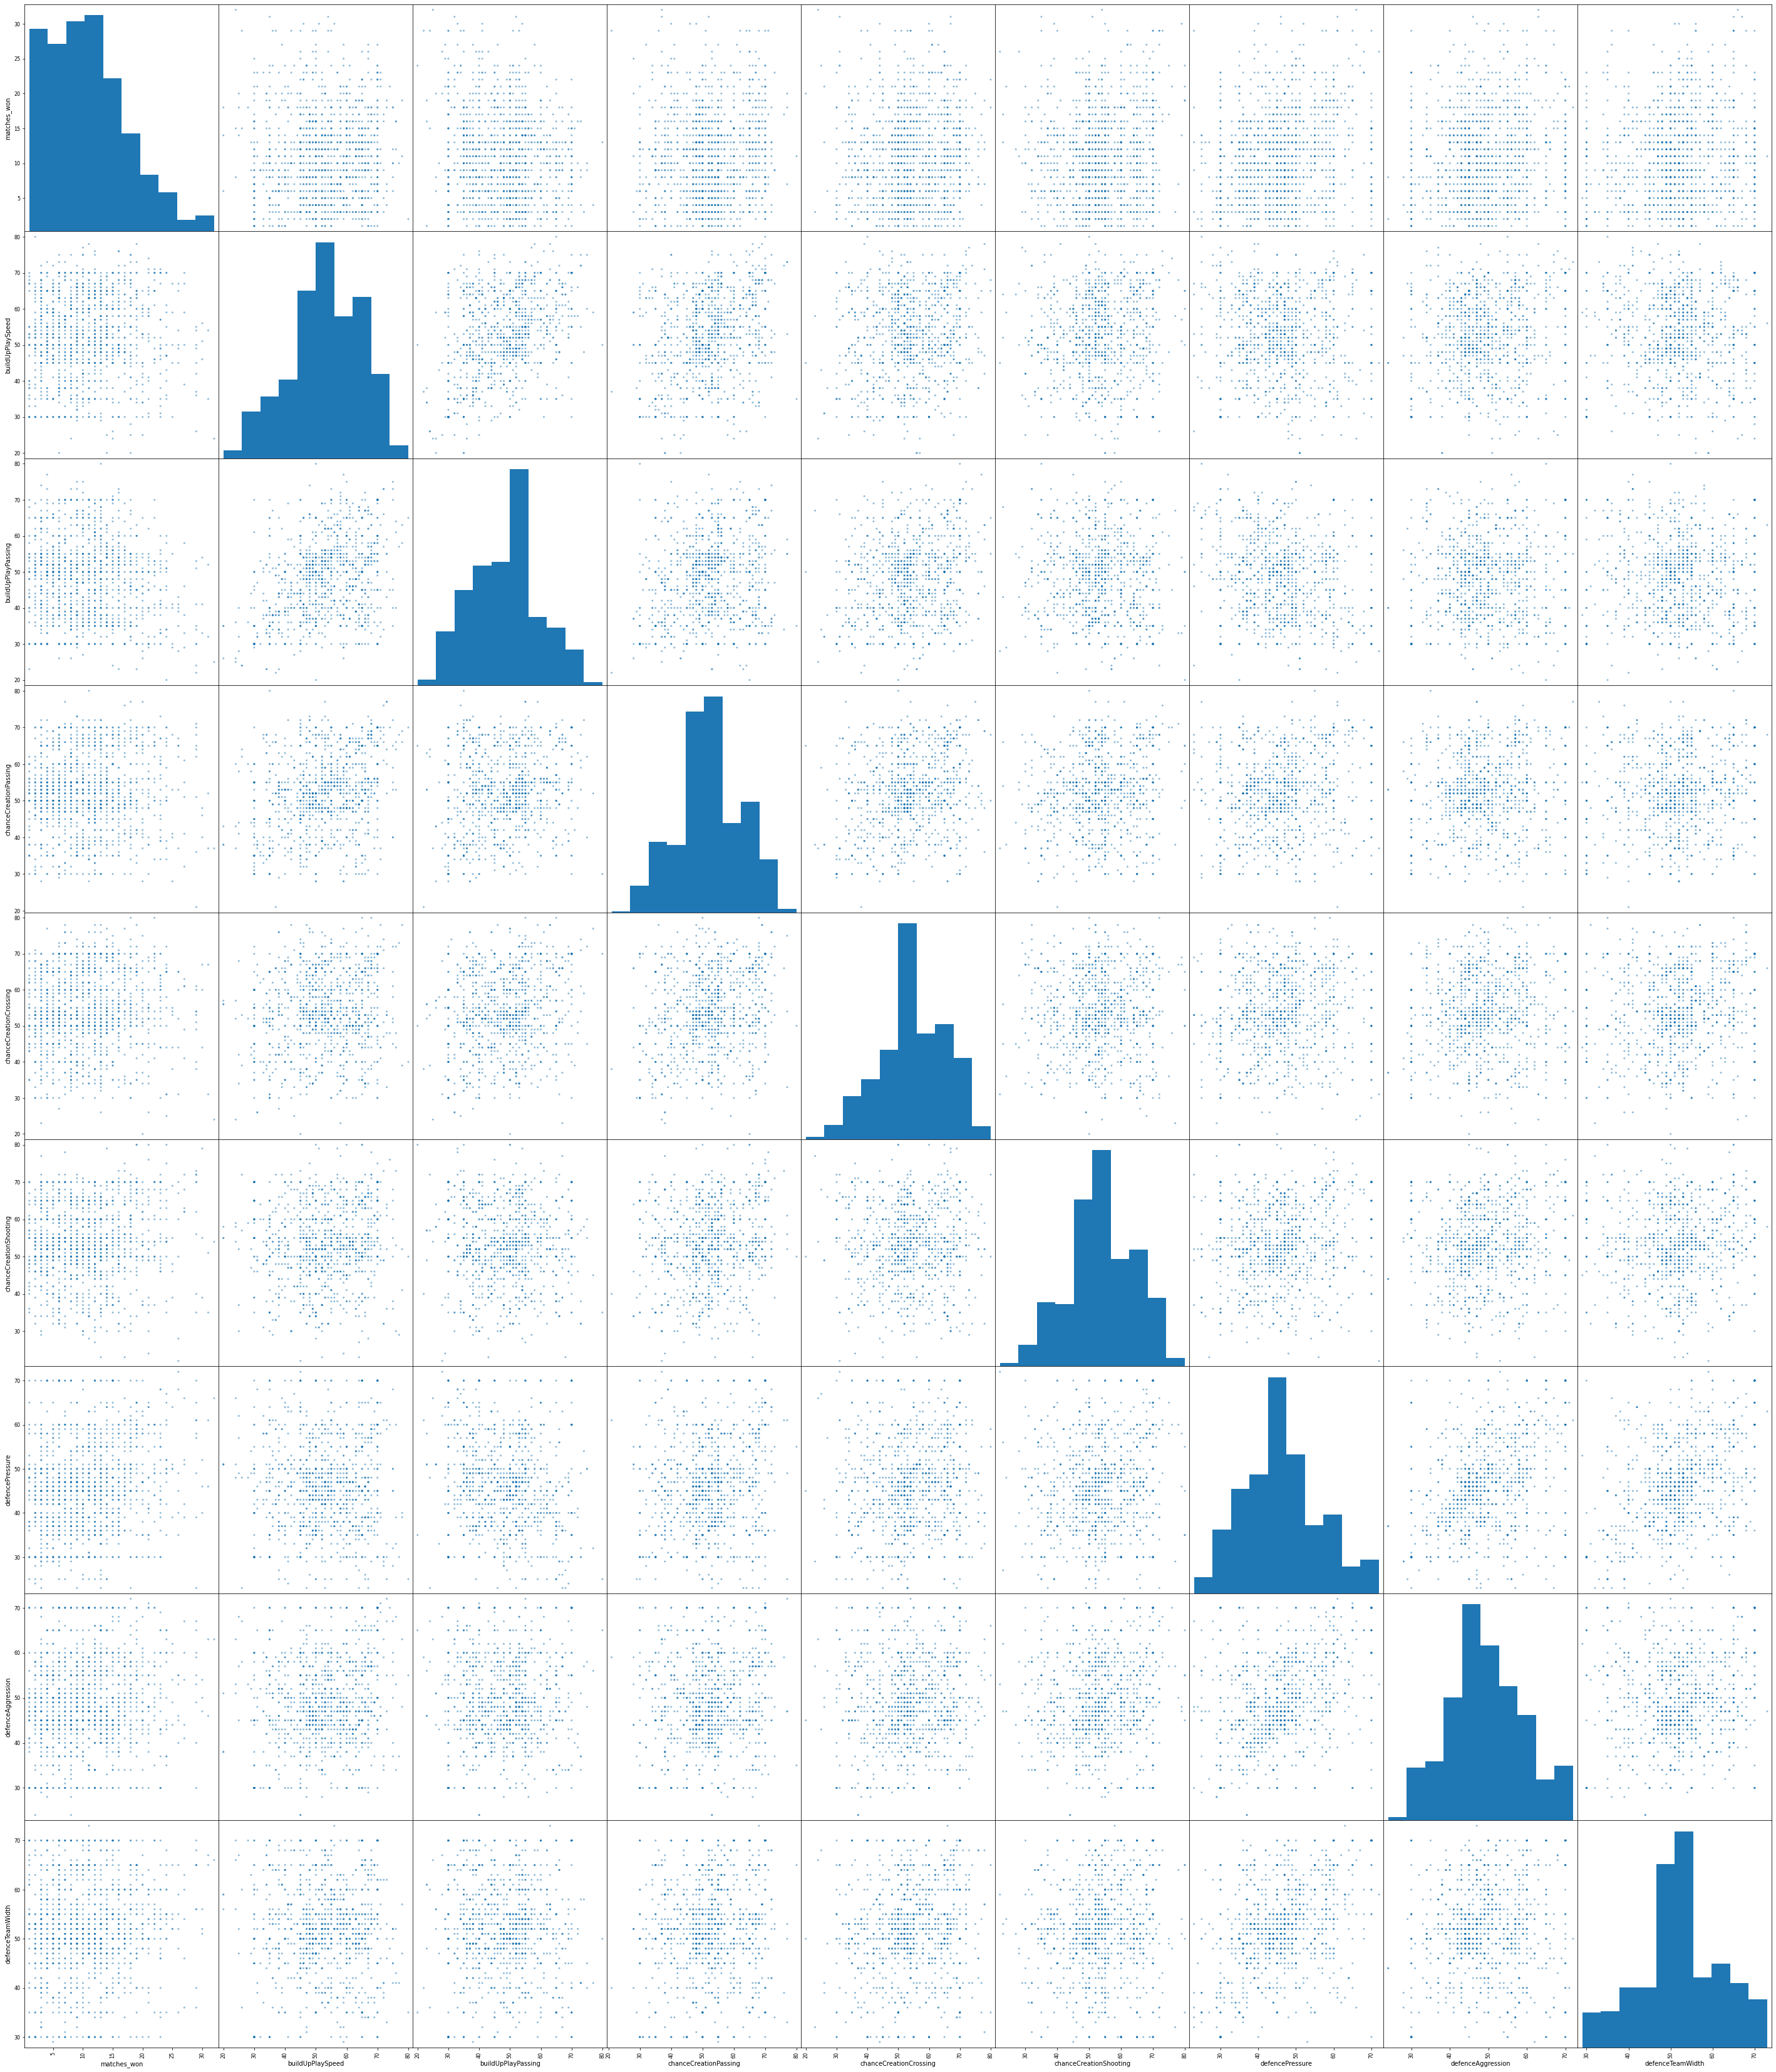

In [88]:
# Let's see a scatter matrix of the team attributes on matches won
pd.plotting.scatter_matrix(wins_team_att.drop(columns = ['team_id', 'year']), figsize=(50,60));

Viewing the scatterplots, there doesn't appear to be any correlation between the team attributes and matches won.

In [89]:
# Examine the correlation between goal_scored and team attributes
wins_team_att.corr()

team_id      year  matches_won  buildUpPlaySpeed  \
team_id                 1.000000  0.058873    -0.053064          0.056861   
year                    0.058873  1.000000     0.019109          0.068724   
matches_won            -0.053064  0.019109     1.000000          0.023934   
buildUpPlaySpeed        0.056861  0.068724     0.023934          1.000000   
buildUpPlayPassing      0.021293  0.059183    -0.131974          0.392311   
chanceCreationPassing   0.008593  0.006330     0.065013          0.310313   
chanceCreationCrossing -0.029991 -0.069256     0.057144          0.160179   
chanceCreationShooting -0.045504 -0.300985     0.093719          0.105451   
defencePressure        -0.071571 -0.091887     0.188829          0.073466   
defenceAggression      -0.026509 -0.088493     0.105611          0.207402   
defenceTeamWidth       -0.082822 -0.051287     0.082501          0.074914   

                        buildUpPlayPassing  chanceCreationPassing  \
team_id                           0.021293               0.008593   
year                              0.059183               0.006330   
matches_won                      -0.131974               0.065013   
buildUpPlaySpeed                  0.392311               0.310313   
buildUpPlayPassing                1.000000               0.180704   
chanceCreationPassing             0.180704               1.000000   
chanceCreationCrossing            0.222081               0.240634   
chanceCreationShooting           -0.078267               0.157270   
defencePressure                  -0.087362               0.199225   
defenceAggression                 0.139146               0.171420   
defenceTeamWidth                  0.018489               0.129654   

                        chanceCreationCrossing  chanceCreationShooting  \
team_id                              -0.029991               -0.045504   
year                                 -0.069256               -0.300985   
matches_won                           0.057144                0.093719   
buildUpPlaySpeed                      0.160179                0.105451   
buildUpPlayPassing                    0.222081               -0.078267   
chanceCreationPassing                 0.240634                0.157270   
chanceCreationCrossing                1.000000                0.024032   
chanceCreationShooting                0.024032                1.000000   
defencePressure                       0.099541                0.170099   
defenceAggression                     0.130462                0.092986   
defenceTeamWidth                      0.140598                0.127483   

                        defencePressure  defenceAggression  defenceTeamWidth  
team_id                       -0.071571          -0.026509         -0.082822  
year                          -0.091887          -0.088493         -0.051287  
matches_won                    0.188829           0.105611          0.082501  
buildUpPlaySpeed               0.073466           0.207402          0.074914  
buildUpPlayPassing            -0.087362           0.139146          0.018489  
chanceCreationPassing          0.199225           0.171420          0.129654  
chanceCreationCrossing         0.099541           0.130462          0.140598  
chanceCreationShooting         0.170099           0.092986          0.127483  
defencePressure                1.000000           0.413940          0.509568  
defenceAggression              0.413940           1.000000          0.243715  
defenceTeamWidth               0.509568           0.243715          1.000000

Team attributes all seem to be **very weakly** correlated with matches won. The closest being defencePressure with a correlation coefficient of 0.18.

<a id='conclusions'></a>
## Conclusions

1. The best teams in each of the top 5 leagues, from 2008 to 2015, were:
   - Based on matches won: Man Utd (EPL), Real Madrid and Barcelona (La Liga), Bayern Munich (Bundesliga), Juventus (Serie A), PSG (Ligue 1)
   - Based on goals scored: Chelsea, Real Madrid, Bayern, Juventus, and Paris Saint-Germain
   
2. The teams that improved their goalscoring the most in each of the top 5 leagues (across the period) were Tottenham Hotspur, Real Madrid CF, Borussia Monchengladbach, Napoli, and Paris Saint-Germain.

3. I found zero to no correlation between the team attributes and goals scored or matches won. 


## Limitation
- Certain teams didn't have goal data in certain seasons.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])